# Capstone project: Predicting heart disease

* [INTRODUCTION](#0)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#1)
* [PREPROCESSING](#2)
* [EXPLORATORY DATA ANALYSIS (EDA)](#3)    
* [SCALING, CATEGORICAL VARIABLES, SPLITTING](#4)
* [MODELS](#5)
* [CONCLUSION](#6)

## 1.1 Information About the Project
Cardiovascular disease, including diseases such as coronary artery disease and stroke, are the leading cause of mortality worldwide. The global burden of heart disease has also increased in recent years, from around 12.4 million deaths in 1990 to 19.8 million deaths in 2022 reflecting both population growth as well as aging. The prevalance of cardiovascular disease varies considerably by country, with deomgraphic factors such as age, sex and ethnicity as well as health-related and behavioural factors such as diet, cholesterol, diabetes, air pollution, obesity, tobacco use, kidney disease, physical inactivity, harmful use of alcohol, and stress. 

**Objective:**  
Being able to detect a patient's risk of heart disease from these factors could be very useful, to support earlier clinical as well as behavioural interventions. This project aims to build, finetune and deploy a binary classification predictive model that can accurately predict whether or not a patient has had a heart attack given information about that patient's demongraphic, health and behavioural characteristics.


**Scope:**  
The project will cover exploratory data analysis of this large dataset, and feature engineering to maximise the utility and efficiency of the available data for predicting heart attacks. Different types of binary classification models will be tested, compared and optimised with the best perfomring model to be taken through for deployment.

## 1.2 Description of the Dataset
The dataset is a large dataset including demographic, health and behavioural characteristics for over 100,000 patients from the USA, as well as information on whether or not they have suffered a heart attack.

- **Source:** The dataset is an open dataset from [Kaggle](https://www.kaggle.com/datasets/tarekmuhammed/patients-data-for-medical-field/data)
- **Size:** Total number of records: 237630, total number of columns: 35
- **Type:** Tabular

## 1.3 Description of the Columns

**Target Variable:** 
- HadHeartAttack: Indicator of whether the patient had a heart attack. This is a binary label (0 = no heart attack, 1 = had heart attack). We are trying to predict from a patients demongraphic, health and behavioural characteristics whether or not they will have had a heart attack.

**Feature Variables:** A brief description of the important columns, including their data types.
- PatientID: Unique identifier for each patient.
- State: Geographic state of residence.
- Sex: Gender of the patient.
- GeneralHealth: Self-reported health status.
- AgeCategory: Categorized age group of the patient.
- HeightInMeters: Height of the patient (in meters).
- WeightInKilograms: Weight of the patient (in kilograms).
- BMI: Body Mass Index, calculated from height and weight.
- HadAngina: Indicator of whether the patient experienced angina.
- HadStroke: Indicator of whether the patient had a stroke.
- HadAsthma: Indicator of whether the patient has asthma.
- HadSkinCancer: Indicator of whether the patient had skin cancer.
- HadCOPD: Indicator of whether the patient had chronic obstructive pulmonary disease (COPD).
- HadDepressiveDisorder: Indicator of whether the patient was diagnosed with a depressive disorder.
- HadKidneyDisease: Indicator of whether the patient had kidney disease.
- HadArthritis: Indicator of whether the patient had arthritis.
- HadDiabetes: Indicator of whether the patient had diabetes.
- DeafOrHardOfHearing: Indicator of hearing impairment.
- BlindOrVisionDifficulty: Indicator of vision impairment.
- DifficultyConcentrating: Indicator of concentration difficulties.
- DifficultyWalking: Indicator of walking difficulties.
- DifficultyDressingBathing: Indicator of difficulties in dressing or bathing.
- DifficultyErrands: Indicator of difficulties in running errands.
- SmokerStatus: Status of whether the patient is a smoker.
- ECigaretteUsage: Indicator of e-cigarette usage.
- ChestScan: Indicator of whether the patient had a chest scan.
- RaceEthnicityCategory: Race or ethnicity of the patient.
- AlcoholDrinkers: Status of whether the patient consumes alcohol.
- HIVTesting: Status of whether the patient was tested for HIV.
- FluVaxLast12: Status of whether the patient received a flu vaccine in the last 12 months.
- PneumoVaxEver: Status of whether the patient ever received a pneumococcal vaccine.
- TetanusLast10Tdap: Status of whether the patient received a tetanus vaccine in the last 10 years.
- HighRiskLastYear: Indicator of whether the patient was at high risk in the last year.
- CovidPos: Status of whether the patient tested positive for COVID-19.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">1. Importing Modules, Load Data & Data Review</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
# Load common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,  Pool
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve 
from sklearn.preprocessing import StandardScaler

import pickle
import os




In [2]:
df= pd.read_excel(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\Capstone project\Heart Disease\data\Patients Data ( Used for Heart Disease Prediction ).xlsx")

In [3]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [4]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [5]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">2. Preprocessing</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 2.1 Check for missing values in the data

In [6]:
df.isna().sum()
# No missing values in the data

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

## 2.2 Check for duplicate values

In [7]:
df.duplicated().sum()

0

There are no missing values or duplicate values in the dataset

## 2.3 Outlier analysis

Text(0.5, 0.98, 'Boxplots for Height, Weight, and BMI')

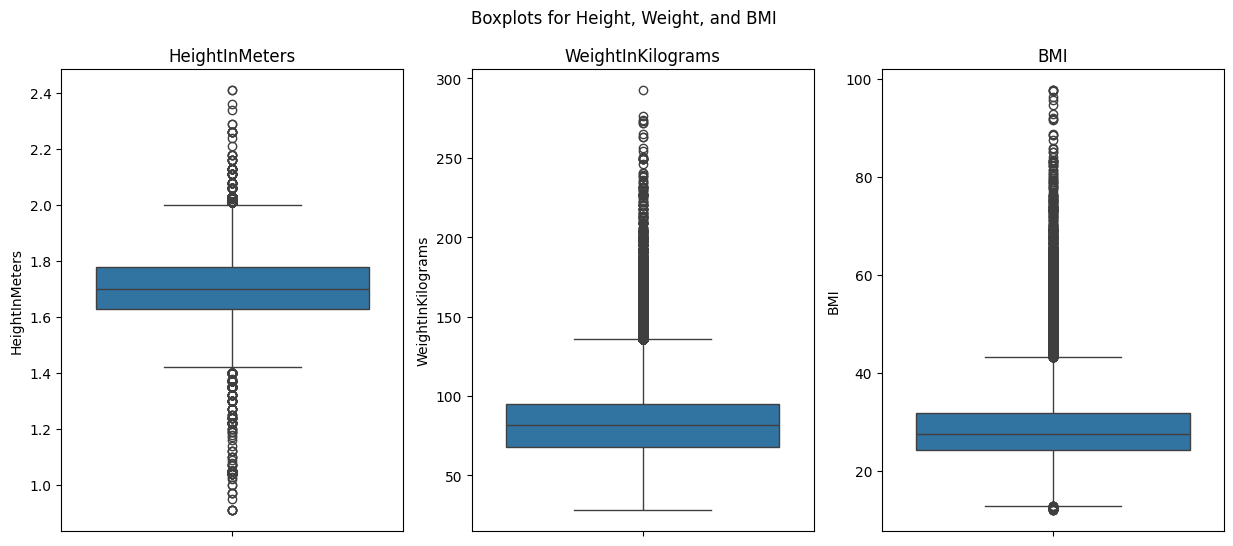

In [8]:
# Plot boxplots of the three continous numeric variables to look for obvious outliers

# create subplots
fig, axes = plt.subplots(1, 3,figsize = (15,6))

# List of columns to plot
columns = ['HeightInMeters', 'WeightInKilograms', 'BMI']

# Plot each column as a separate boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
  

# Add an overarching title
plt.suptitle("Boxplots for Height, Weight, and BMI")

Seems like there are some individuals with extremely high weight and BMI, these could be real though. Prevalance of of class 3 obesity (BMI>40) ~9.2% of US adults (CDC 2018 data), of these obese individuals some smaller subset (<0.1%) have an extreme BMI >80. Out of population of 237630, we'd therefore expect roughly 237630 * 0.092 * 0.001 = 22 indivudals.

In [9]:
# Number of inidividuals we might expect to have extreme obesity (BMI > 80)
print(237630 * 0.092 * 0.001)

# Number of people in our data who have extreme obesity (BMI > 80)
len(df[df['BMI'] > 80])

21.86196


36

These numbers are quite similar to one another. In addition, our dataset isn't a random subset of the population: no individuals under 18 are in the data yet ~24% of people in the US are under age 19 see [Census 2023](https://www.census.gov/data/tables/2023/demo/age-and-sex/2023-age-sex-composition.html). Children under 19 are less likely to suffer from extreme obesity than older individuals.

In [10]:
# Distriubtion of age categories by percentage. No children under the age of 18 are in the dataset.
((df['AgeCategory'].value_counts())/237630)*100


AgeCategory
Age 65 to 69       11.592392
Age 60 to 64       10.808820
Age 70 to 74       10.497833
Age 55 to 59        9.014855
Age 50 to 54        8.060430
Age 75 to 79        7.439717
Age 80 or older     7.382906
Age 40 to 44        6.829104
Age 45 to 49        6.773135
Age 35 to 39        6.304760
Age 30 to 34        5.397046
Age 18 to 24        5.376846
Age 25 to 29        4.522156
Name: count, dtype: float64

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [11]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Univariate distributions of categorical variables

Fix the order othe categorical variables

In [12]:
df['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       27547
Age 60 to 64       25685
Age 70 to 74       24946
Age 55 to 59       21422
Age 50 to 54       19154
Age 75 to 79       17679
Age 80 or older    17544
Age 40 to 44       16228
Age 45 to 49       16095
Age 35 to 39       14982
Age 30 to 34       12825
Age 18 to 24       12777
Age 25 to 29       10746
Name: count, dtype: int64

In [13]:
# Correct order for AgeCategory
age_order = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
    'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
    'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
    'Age 80 or older'
]

# Convert AgeCategory to a categorical type with the specified order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

In [14]:
# Correct order for General Health
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

df['GeneralHealth'] = pd.Categorical(df['GeneralHealth'], categories = health_order, ordered = True)

In [15]:
#Change order for diabetes, ecigs, smoker
diabetes_order = [
    'No',
    'No, pre-diabetes or borderline diabetes', 
    'Yes, but only during pregnancy (female)', 
    'Yes'
]

ecig_order = [
    'Never used e-cigarettes in my entire life', 
    'Not at all (right now)', 
    'Use them some days', 
    'Use them every day'
]

smoker_order = [
    'Never smoked', 
    'Former smoker', 
    'Current smoker - now smokes some days', 
    'Current smoker - now smokes every day'
]


# Convert columns to categorical with the specified order
df['HadDiabetes'] = pd.Categorical(df['HadDiabetes'], categories=diabetes_order, ordered=True)
df['ECigaretteUsage'] = pd.Categorical(df['ECigaretteUsage'], categories=ecig_order, ordered=True)
df['SmokerStatus'] = pd.Categorical(df['SmokerStatus'], categories=smoker_order, ordered=True)


In [16]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

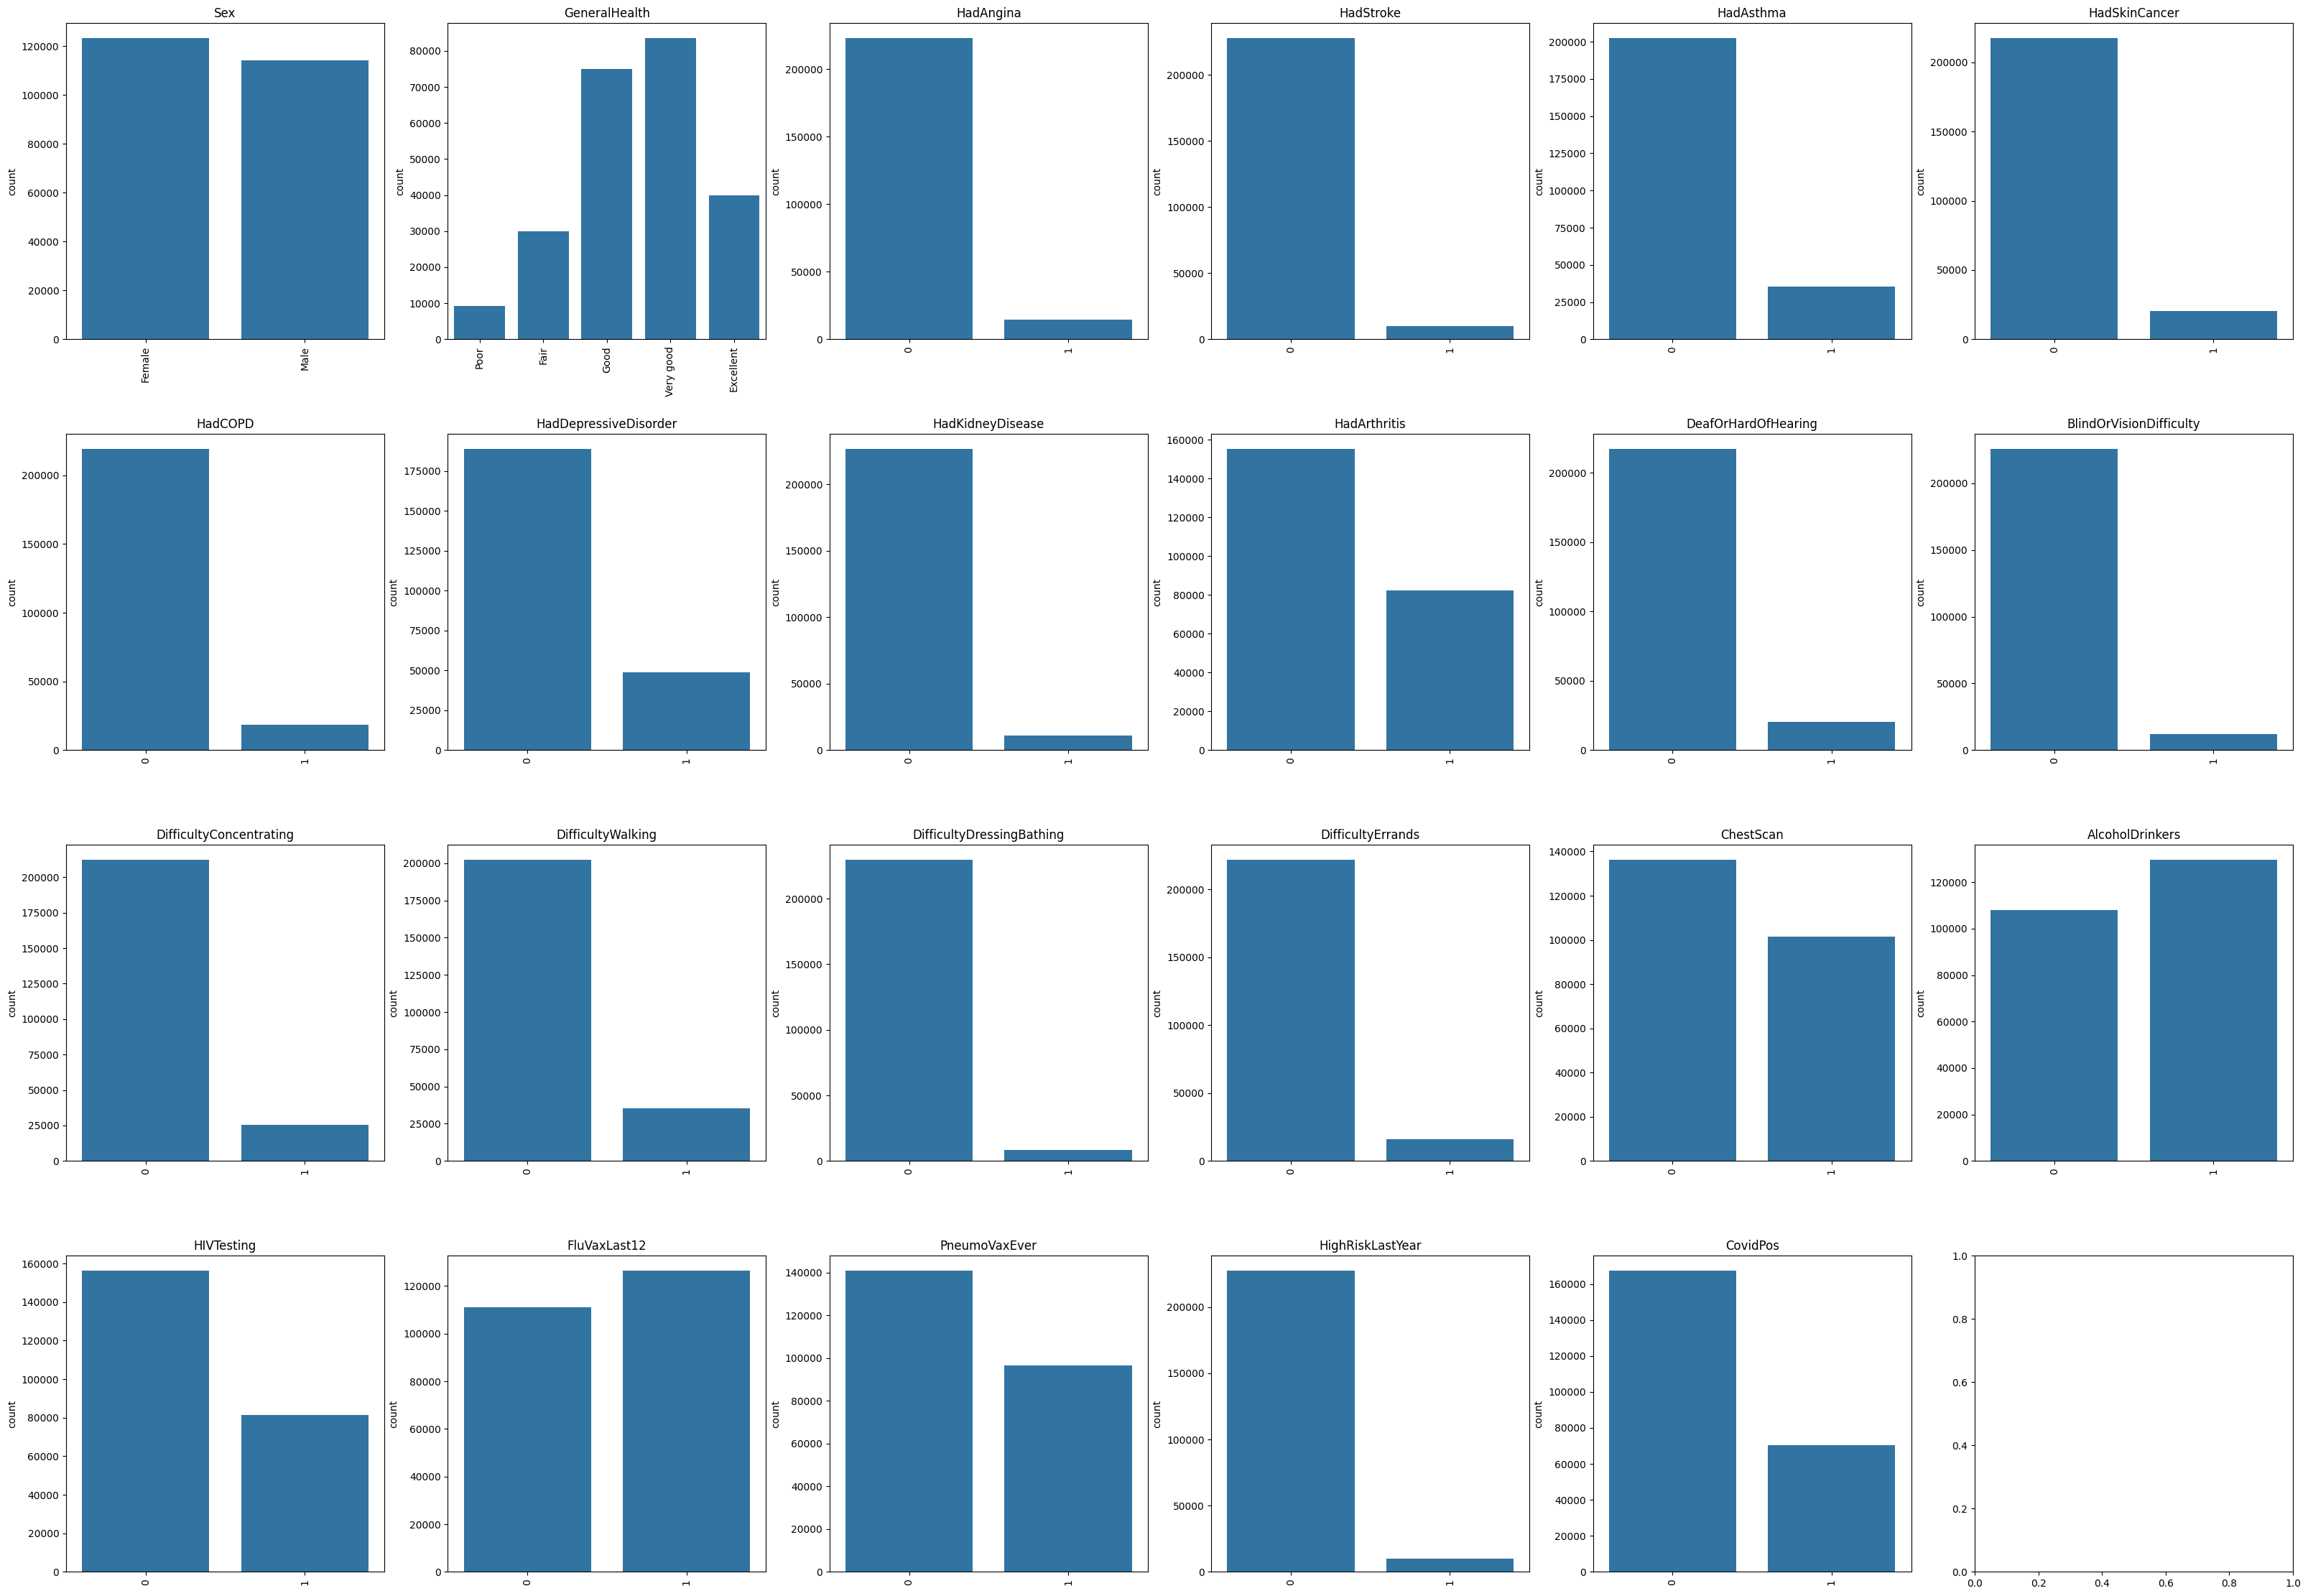

In [17]:
cat_vars1 = ['Sex','GeneralHealth','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 
       'ChestScan',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',  'HighRiskLastYear', 'CovidPos']


fig, axes = plt.subplots(4,6, figsize = (40, 28))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars1):
    row, col_idx = divmod(i, 6)
    sns.countplot(x = col, data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 

plt.subplots_adjust(hspace=0.3)
plt.show()


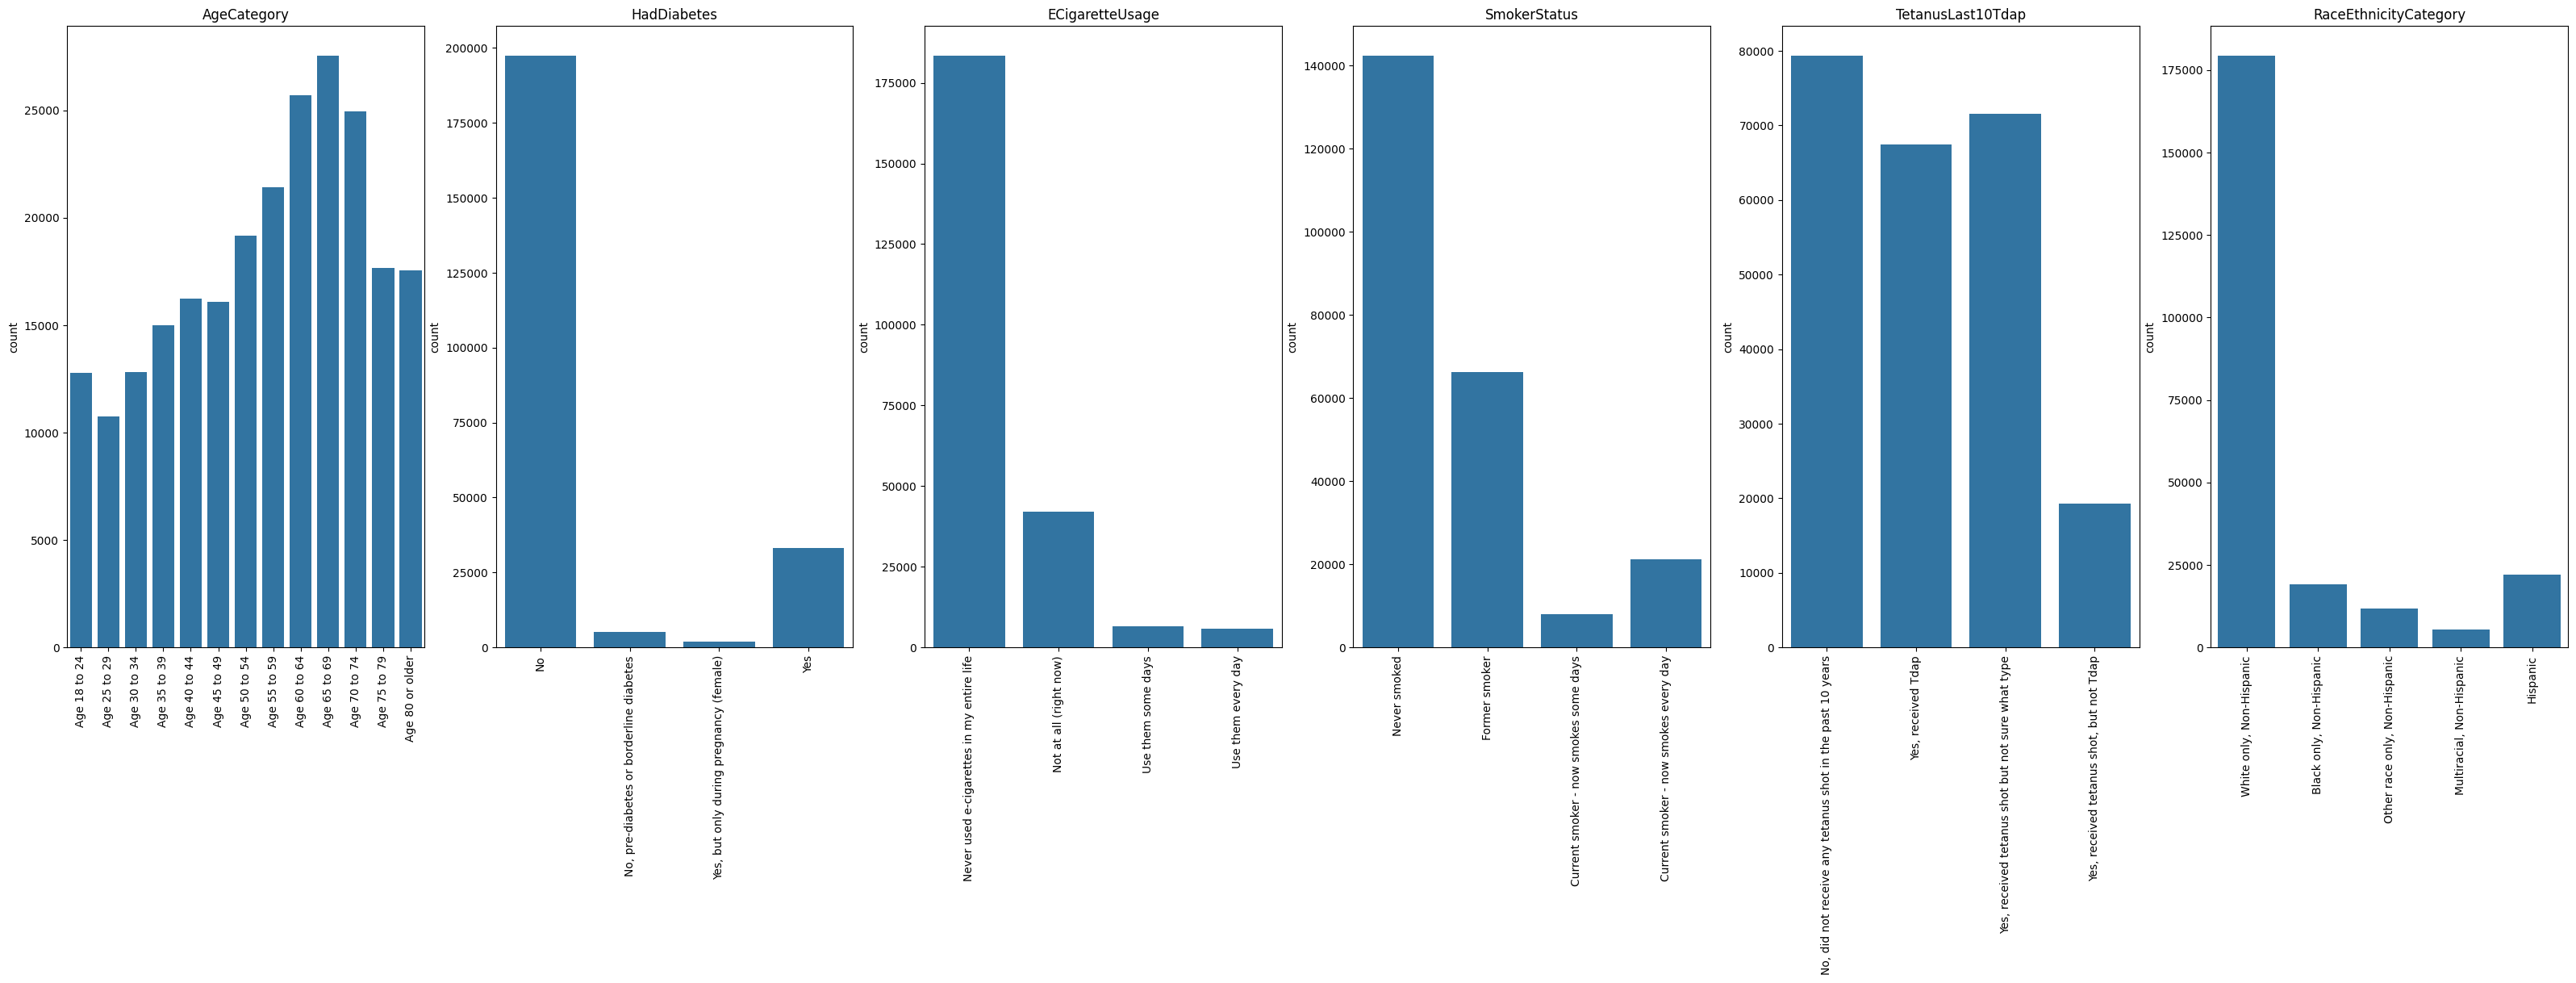

In [18]:
cat_vars2 = ['AgeCategory','HadDiabetes', 'ECigaretteUsage', 'SmokerStatus','TetanusLast10Tdap','RaceEthnicityCategory']

fig, axes = plt.subplots(1,6, figsize = (40, 10))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars2):
    sns.countplot(x = col, data = df, ax= axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel("") 

plt.show()

## Associations with the target variable

### Demographic characteristics

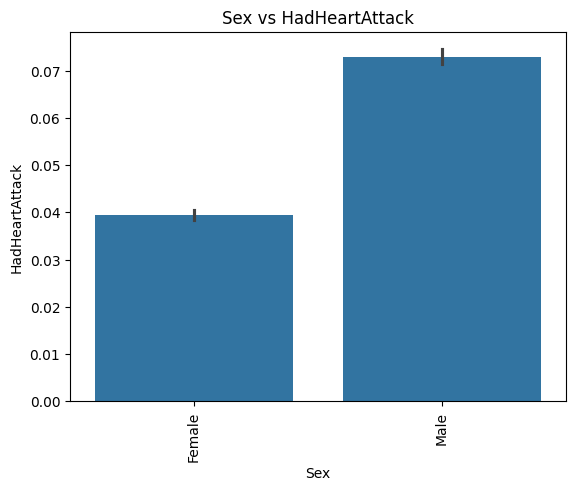

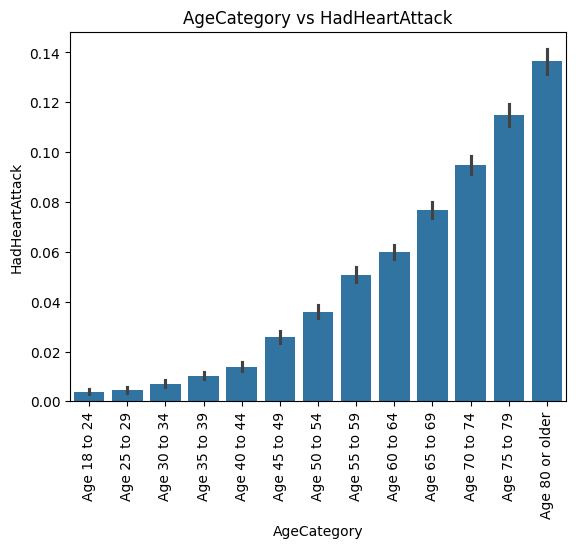

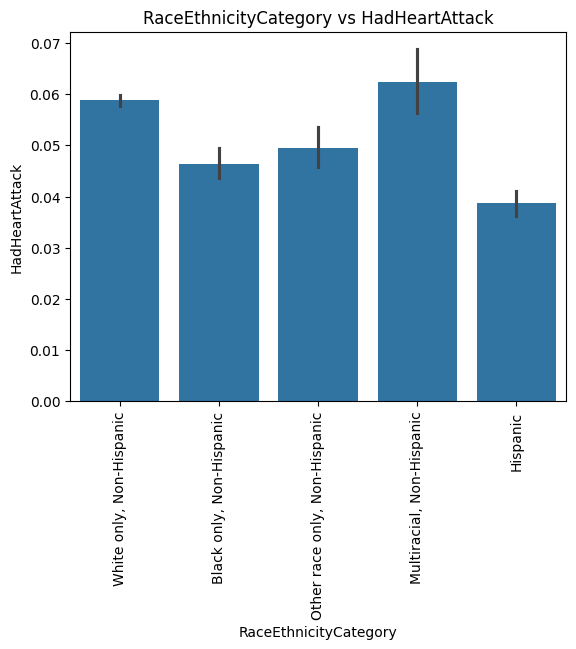

In [19]:
for col in ['Sex', 'AgeCategory', 'RaceEthnicityCategory']:
    sns.barplot(x=col, y='HadHeartAttack', data=df)
    plt.xticks(rotation = 90)
    plt.title(f'{col} vs HadHeartAttack')
    plt.show()

Age is a strong risk factor for heart attacks, and males are much more likely than females to have had a heartattack. Not much differences by race or ethnicity though

### Behavioural characteristics

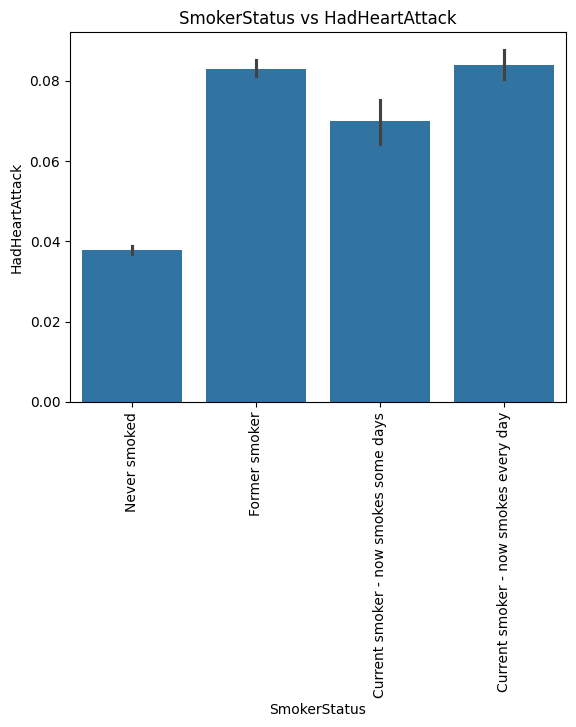

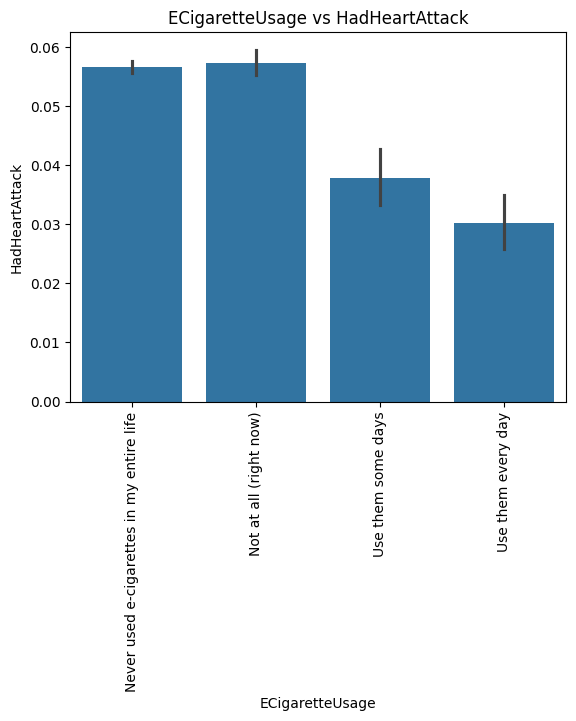

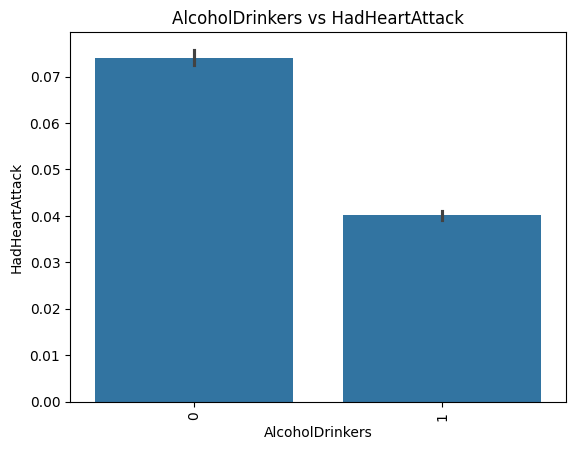

In [20]:
for col in ['SmokerStatus', 'ECigaretteUsage','AlcoholDrinkers']:
    sns.barplot(x = col, y = 'HadHeartAttack', data = df)
    plt.xticks(rotation = 90)
    plt.title(f'{col} vs HadHeartAttack')
    plt.show()

Smoking is a risk, but it doesn't seem to matter too much whether the individual formerly smoked or is a current smoker. Ecigarette usage looks protective of heart attacks, but this is likely because users of Ecigarettes are also younger. Surprisingly, alcohol usage also seems to be protective (this could because of age again)

### Health characteristics and their association with having a heart attack

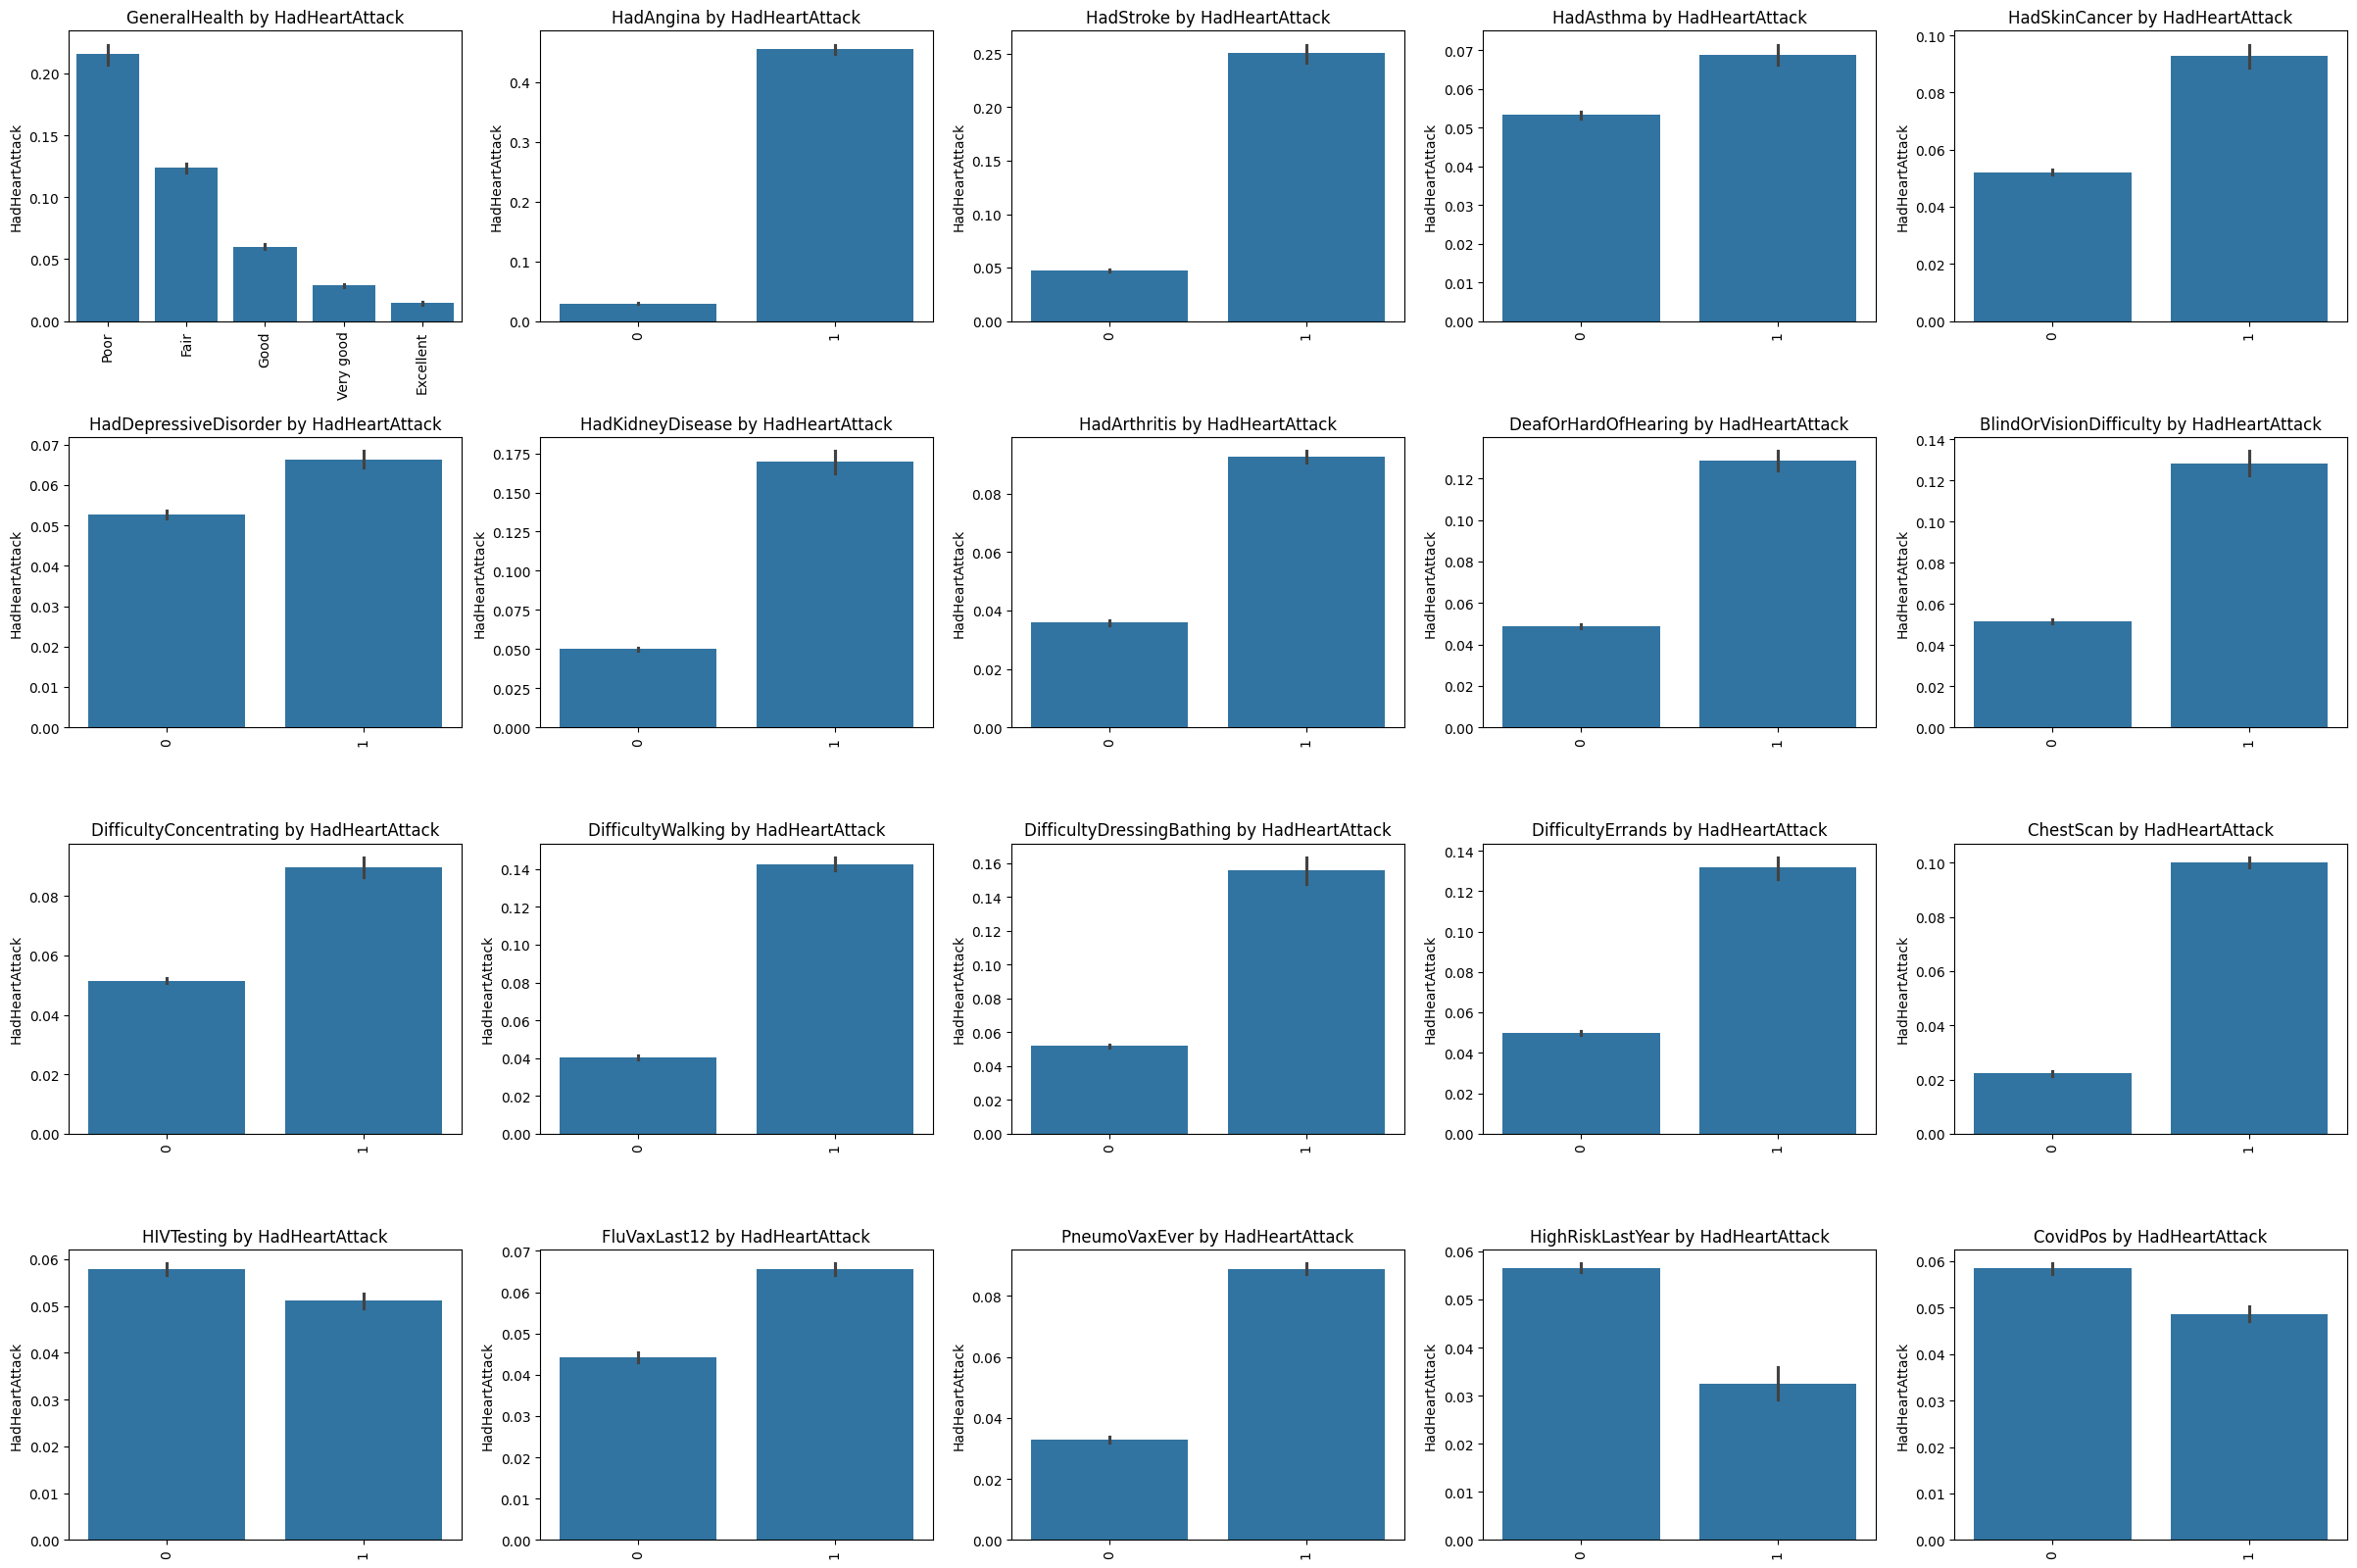

In [21]:
cat_vars3 = ['GeneralHealth','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 
       'ChestScan',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',  'HighRiskLastYear', 'CovidPos']


fig, axes = plt.subplots(4,5, figsize = (30, 20))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars3):
    row, col_idx = divmod(i, 5)
    sns.barplot(x = col, y= 'HadHeartAttack', data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by HadHeartAttack')
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 

plt.subplots_adjust(hspace=0.4)
plt.show()

There appear to be clear differences in risk of heart attack depending on many of these health characteristics. Many of these are also likely associated with increasing age, howver, so it's difficult to distinguish between these two effects in these plots. Below, I plot the same but grouped now by age category, to show where the differences are being driven only by age, or where there are additional effects

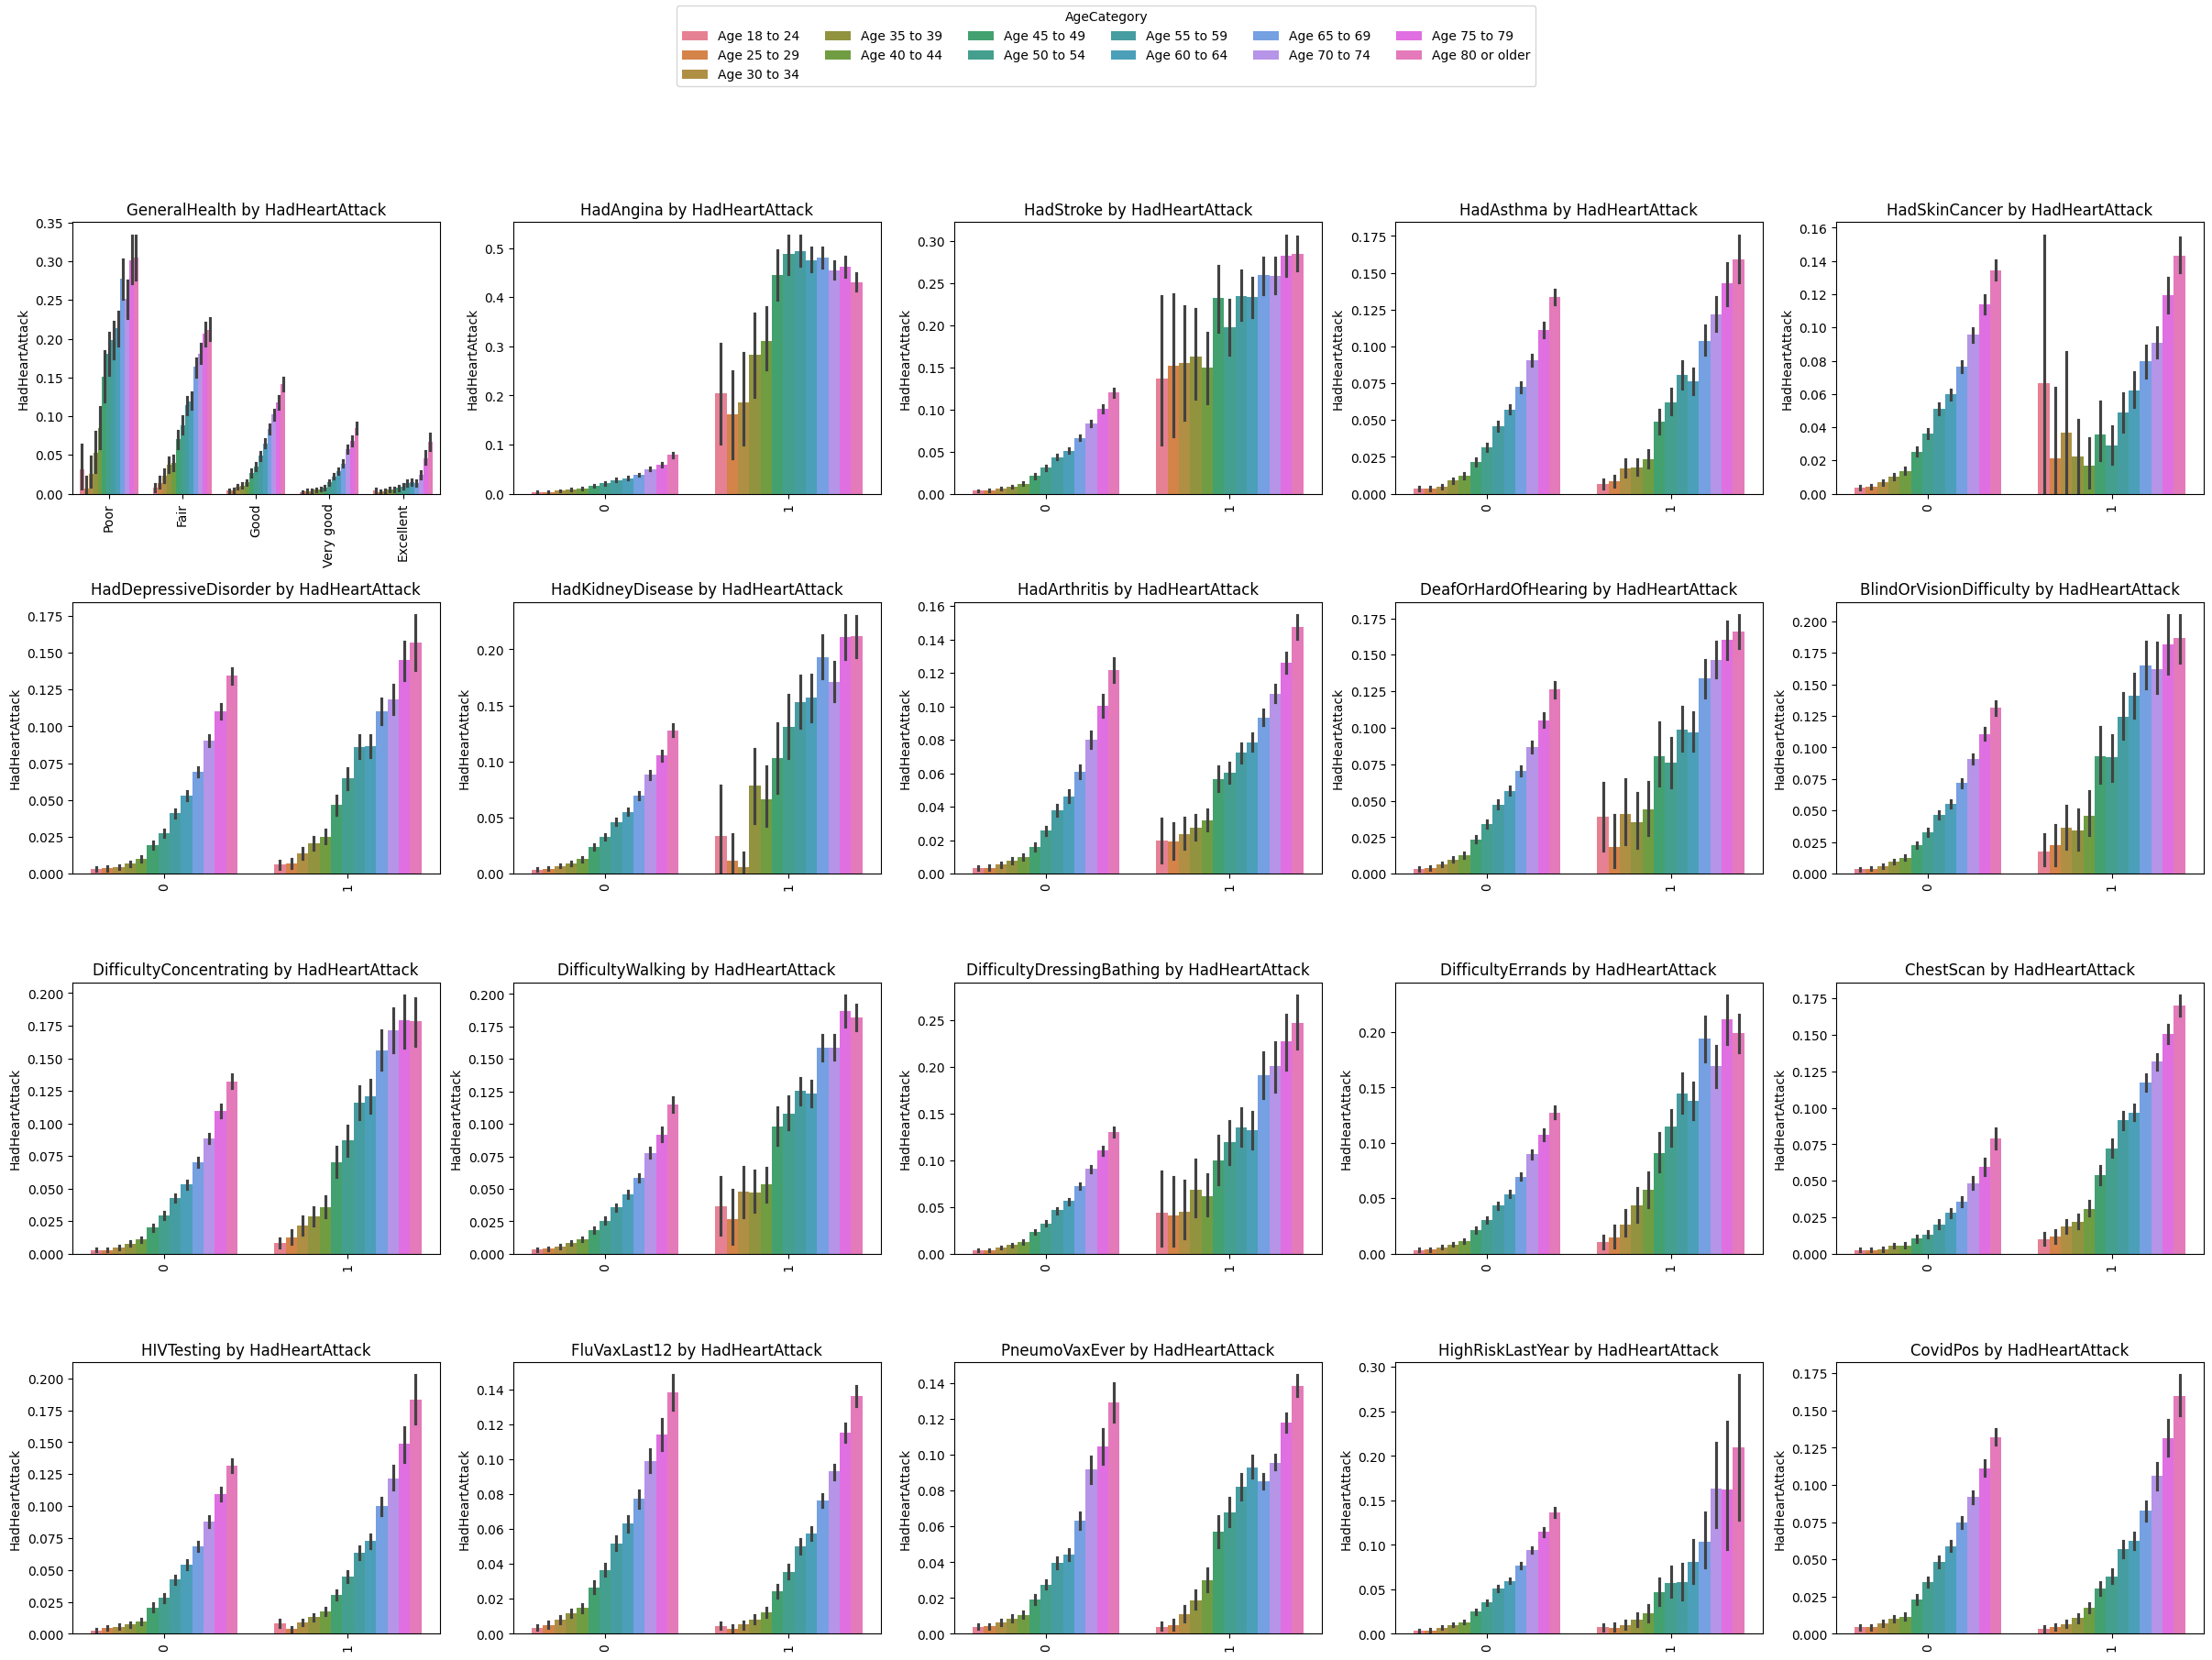

In [22]:
fig, axes = plt.subplots(4,5, figsize = (30, 20))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars3):
    row, col_idx = divmod(i, 5)
    sns.barplot(x = col, y= 'HadHeartAttack', hue= 'AgeCategory', data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by HadHeartAttack')
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 
    axes[row, col_idx].get_legend().remove()

# Add a single legend to the figure
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get legend from the first subplot
fig.legend(handles, labels, title='AgeCategory', loc='upper center', ncol=6)

plt.subplots_adjust(hspace=0.4)
plt.show()


Grouping by age, we can see General Health is still a strong predictor of whether an individual has had a heart attack or not. Stroke and most especially angina are also associated with higher risk, other conditions show weaker effects

### Continuous variables like height, weight, and BMI on heart attack likelihood

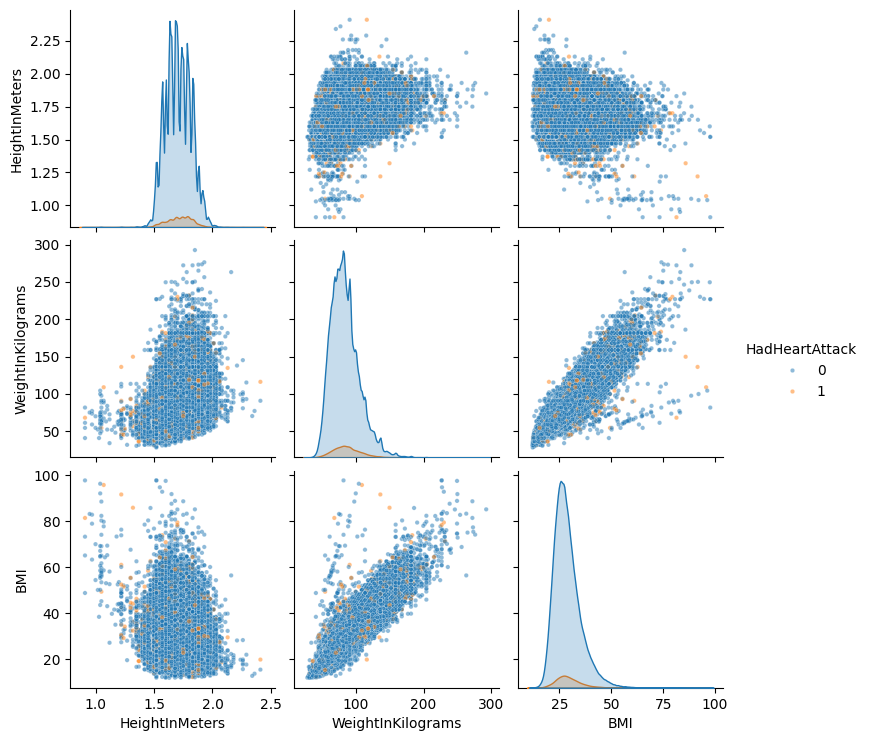

In [23]:
sns.pairplot(df, vars=['HeightInMeters', 'WeightInKilograms', 'BMI'], hue='HadHeartAttack', plot_kws={'alpha': 0.5, 's':10} )
plt.show()

There doesn't seem to be any obvious patterns here, the distributions of height, weight and BMI appear similar among the HadHeartAttack = 0 and HadHeartAttack = 1 groups

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">4. Scaling, Categorical Variables, and Splitting</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>


## 4.1 Encoding categorical variables

### AgeCategory needs to be encoded 
This is an ordinal feature so ordinal encoding should work well for tree models I want to try, won't work as well with linear models

In [24]:
# Encode AgeCategory. Try ordinal encoding (should work well for tree, mught not work so well for linear models)
df['age'] = df['AgeCategory'].map({'Age 18 to 24': 0,
                                   'Age 25 to 29': 1,
                                   'Age 30 to 34': 2,
                                   'Age 35 to 39': 3,
                                   'Age 40 to 44': 4,
                                   'Age 45 to 49': 5,
                                   'Age 50 to 54': 6,
                                   'Age 55 to 59': 7,
                                   'Age 60 to 64': 8,
                                   'Age 65 to 69': 9,
                                   'Age 70 to 74': 10,
                                   'Age 75 to 79': 11,
                                   'Age 80 or older': 12})

df.drop('AgeCategory', axis = 1, inplace = True)

### Encode smoker status. Try ordinal encoding first (since we assume some ordinaliry in risk) to make model training and testing more efficient


In [25]:
# Ordinal Encoding for SmokerStatus
df['smoker'] = df['SmokerStatus'].map({"Never smoked": 0,
                                       "Former smoker": 1,
                                        "Current smoker - now smokes some days": 2,
                                        "Current smoker - now smokes every day": 3})
df.drop('SmokerStatus', axis = 1, inplace = True)

### Encode sex through binary encoding (no need to one-hot encode as only 2 categories)

In [26]:

df['sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df.drop('Sex', axis = 1, inplace = True)


### Ordinally encode GeneralHealth feature


In [27]:
df['gen_health'] = df['GeneralHealth'].map({'Excellent': 0,
                                               'Very good': 1,
                                               'Good': 2,
                                               'Fair': 3,
                                               'Poor': 4})

df.drop('GeneralHealth', axis = 1, inplace = True)

### Encode HadDiabetes

In [28]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

In [29]:
df['diabetes_binary'] = df['HadDiabetes'].map({
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes': 1,
    'Yes, but only during pregnancy (female)': 1
})

df.drop('HadDiabetes', axis = 1, inplace = True)

### Encode ECigaretteUsage
Also has some ordinality, encode as such

In [30]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    183446
Not at all (right now)                        41963
Use them some days                             6468
Use them every day                             5753
Name: count, dtype: int64

In [31]:
df['ECigaretteUsage'] = df['ECigaretteUsage'].map({'Never used e-cigarettes in my entire life':0,
                                                   'Not at all (right now)': 1,
                                                   'Use them some days': 2,
                                                   'Use them every day': 3})

In [32]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
0    183446
1     41963
2      6468
3      5753
Name: count, dtype: int64

### Tetatnus jab

In [33]:
df['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    79370
Yes, received tetanus shot but not sure what type            71538
Yes, received Tdap                                           67418
Yes, received tetanus shot, but not Tdap                     19304
Name: count, dtype: int64

In [34]:
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map({'No, did not receive any tetanus shot in the past 10 years': 0,
                                                       'Yes, received tetanus shot but not sure what type': 1,
                                                       'Yes, received Tdap': 1,
                                                       'Yes, received tetanus shot, but not Tdap': 1})

In [35]:
df['TetanusLast10Tdap'].value_counts(dropna = False)

TetanusLast10Tdap
1    158260
0     79370
Name: count, dtype: int64

Race/ethinicity does not seem important as a feature in this data (see figure above), drop it. Also drop State and PatientID

In [36]:
df.drop(['RaceEthnicityCategory','State','PatientID'], axis = 1, inplace = True)

### Convert all categorical columns to numeric

In [37]:

categorical_columns = df.select_dtypes(include=['category']).columns

# Apply conversion for both train and test sets
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.astype('int'))

In [38]:
print(df.dtypes)


HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
ECigaretteUsage                int32
ChestScan                      int64
AlcoholDrinkers                int64
HIVTesting                     int64
FluVaxLast12                   int64
PneumoVaxEver                  int64
TetanusLast10Tdap              int64
HighRiskLastYear               int64
CovidPos                       int64
a

## 4.2 Splitting
Split the data into training and testing sets to avoid data leakage


In [39]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
0    224429
1     13201
Name: count, dtype: int64

Target variable is highly imbalanced, need to stratify our split

In [40]:
df.columns

Index(['HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
       'age', 'smoker', 'sex', 'gen_health', 'diabetes_binary'],
      dtype='object')

In [41]:
X = df.drop('HadHeartAttack', axis = 1)
y = df['HadHeartAttack']

In [42]:
X.shape, y.shape

((237630, 31), (237630,))

In [43]:
X.head()

,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,age,smoker,sex,gen_health,diabetes_binary
0,1.63,84.820000,32.099998,1,0,1,1,0,0,0,...,0,1,0,0,1,11,1,0,3,1
1,1.60,71.669998,27.990000,0,0,0,0,0,0,0,...,1,1,1,0,0,9,1,0,1,0
2,1.78,71.209999,22.530001,0,0,0,0,0,0,0,...,0,0,1,0,0,8,0,1,0,0
3,1.78,95.250000,30.129999,0,0,0,0,0,0,0,...,1,1,1,0,0,10,1,1,1,1
4,1.68,78.019997,27.760000,0,0,0,0,0,0,0,...,1,0,0,0,0,6,0,0,2,0


In [44]:

# split the data into train test split. Stratify the target variable so that the split leads to balanced classes in both train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

## Scaling the data for disance/logistic regression models

In [45]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Calculate ratio of the classes for model parameters (e.g. logistic regression, XGBoost)

In [46]:
# Calculate scale_pos_weight for imbalanced dataset for XGBoost model
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Linear models and kernel-based models

Logistic Regression
- With regularization (L1/L2 penalties to prevent overfitting).
- Add class weights to handle imbalances

Support Vector Machines
- Large dataset so training likely to be too long to fine-tune
- Adjust class weights for imbalanced dataset

## Support Vector Machines

In [141]:
# Initialise and fit an SVM model

# Initialize SVM with balanced class weights and probability outputs enabled
svm_clf = svm.SVC(class_weight='balanced', probability=True, random_state=42)

# Fit the model on the scaled training data
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_train = svm_clf.predict(X_train_scaled)
y_pred_test = svm_clf.predict(X_test_scaled)
y_pred_proba_train = svm_clf.predict_proba(X_train_scaled)[:, 1]  # Predicted probabilities for the positive class
y_pred_proba_test = svm_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate F1 score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")

# Calculate Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")

# Calculate Precision
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")

# Calculate ROC AUC
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print(f"ROC AUC train: {roc_auc_train:.2f}")
print(f"ROC AUC test: {roc_auc_test:.2f}")

F1 score train: 0.46
F1 score test: 0.35
Recall train: 0.86
Recall test: 0.65
Precision train: 0.32
Precision test: 0.24
ROC AUC train: 0.94
ROC AUC test: 0.84


Training time: 234minutes

Evaluation metrics default SVM:

F1 score train: 0.46
F1 score test: 0.35
Recall train: 0.86
Recall test: 0.65
Precision train: 0.32
Precision test: 0.24
ROC AUC train: 0.94
ROC AUC test: 0.84

Some evidence of overfitting - needs fine-tuning but takes ~4hours to train once!

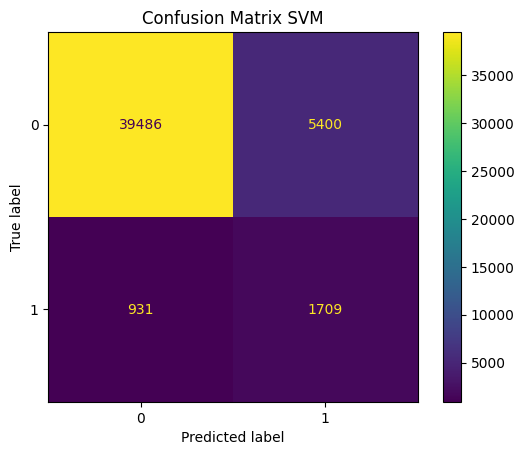

In [142]:

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.title("Confusion Matrix SVM")
plt.show()

## Logistic regression

In [81]:
# Initialize Logistic Regression model with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
logreg.fit(X_train_scaled, y_train)

# predict classes
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Predict probabilities
y_train_probs = logreg.predict_proba(X_train_scaled)[:, 1]  # Probabilities for class 1
y_test_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
# Training Metrics
f1_train = f1_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_probs)

# Testing Metrics
f1_test = f1_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_probs)

metrics = {
    "Model": "Logistic Regression",
    "F1 Score Train": round(f1_train, 2),
    "F1 Score Test": round(f1_test, 2),
    "Recall Train": round(recall_train, 2),
    "Recall Test": round(recall_test, 2),
    "Precision Train": round(precision_train, 2),
    "Precision Test": round(precision_test, 2),
    "ROC AUC Train": round(roc_auc_train, 2),
    "ROC AUC Test": round(roc_auc_test, 2)
}

# Convert to a DataFrame
log_reg_metrics_df = pd.DataFrame([metrics])

# Set 'Model' column as index
log_reg_metrics_df.set_index("Model", inplace=True)

print(metrics)



{'Model': 'Logistic Regression', 'F1 Score Train': 0.34, 'F1 Score Test': 0.34, 'Recall Train': 0.77, 'Recall Test': 0.76, 'Precision Train': 0.22, 'Precision Test': 0.22, 'ROC AUC Train': 0.89, 'ROC AUC Test': 0.88}


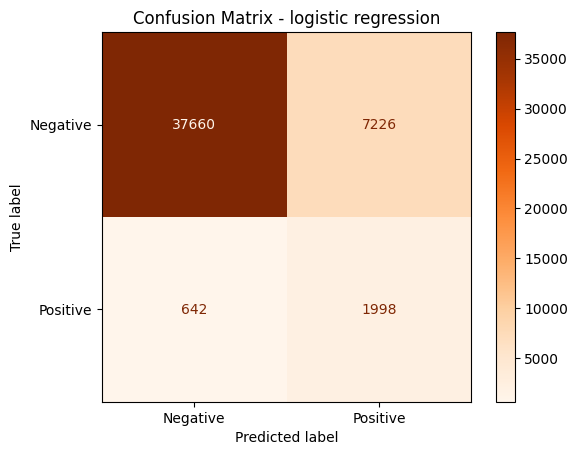

In [61]:
# look at confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Negative", "Positive"])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - logistic regression")
plt.show()

# Decision Tree-based models 

## Random Forest

In [49]:
# initialise the RF classifier
rf_clf = RandomForestClassifier(class_weight = 'balanced',n_estimators = 100, random_state = 42)

# train the model
rf_clf.fit(X_train, y_train)

# make predicitons
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
y_pred_proba_train = rf_clf.predict_proba(X_train)[:,1] 
y_pred_proba_test = rf_clf.predict_proba(X_test)[:,1] # get the predicted probabilities for the positive class

# f1_score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")
# Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")


# ROC AUC
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print(f"ROC AUC train: {roc_auc_train:.2f}")
print(f"ROC AUC test: {roc_auc_test:.2f}")

F1 score train: 1.00
F1 score test: 0.24
Recall train: 1.00
Recall test: 0.15
Precision train: 1.00
Precision test: 0.57
ROC AUC train: 1.00
ROC AUC test: 0.86


Massive overfitting when training a Random Forest using default parameters. Fine-tuning will improve performance:

In [146]:
# Try GridSearchCV to find best RF parameters
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [2, 10, 50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC
    cv=5,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
176 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python31

Best params are: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 1000}
Best ROC AUC score: 0.8884243049711922
Train F1 Score: 0.3822, Test F1 Score: 0.3468
Train Recall: 0.8210, Test Recall: 0.7379
Train Precision: 0.2491, Test Precision: 0.2267
Train ROC AUC: 0.9233, Test ROC AUC: 0.8856


Best params are: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 1000}
Best ROC AUC score: 0.8884243049711922
Train F1 Score: 0.3822, Test F1 Score: 0.3468
Train Recall: 0.8210, Test Recall: 0.7379
Train Precision: 0.2491, Test Precision: 0.2267
Train ROC AUC: 0.9233, Test ROC AUC: 0.8856

In [47]:
# initialise the finetuned RF classifier
rf_clf_best_model = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 1000, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 50,
                                max_depth= 50,
                                random_state = 42)

# train the model
rf_clf_best_model.fit(X_train, y_train)

# make predicitons
y_pred_train = rf_clf_best_model.predict(X_train)
y_pred_test = rf_clf_best_model.predict(X_test)
y_pred_proba_train = rf_clf_best_model.predict_proba(X_train)[:,1] 
y_pred_proba_test = rf_clf_best_model.predict_proba(X_test)[:,1] # get the predicted probabilities for the positive class only (col 1)

# f1_score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")
# Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")


# ROC AUC
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print(f"ROC AUC train: {roc_auc_train:.2f}")
print(f"ROC AUC test: {roc_auc_test:.2f}")

F1 score train: 0.38
F1 score test: 0.35
Recall train: 0.82
Recall test: 0.74
Precision train: 0.25
Precision test: 0.23
ROC AUC train: 0.92
ROC AUC test: 0.89


In [85]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[38240  6646]
 [  692  1948]]


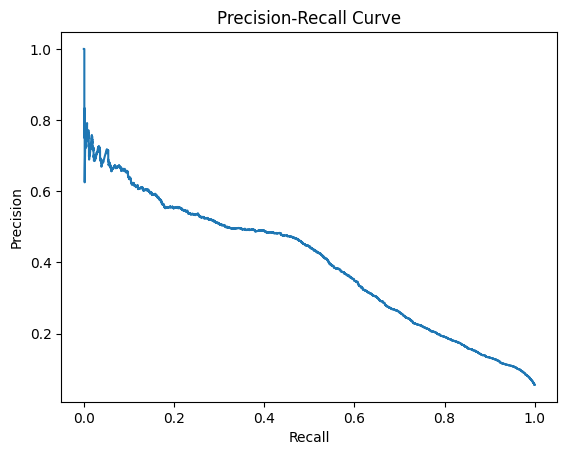

In [54]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Gradient boosting models (XGBoost, LightGBM, CatBoost)

XGBoost training is quite a lot faster than Random Forest

In [151]:
# Try XGBoost, lightGBM, CatBoost
# define model names for loop
models = {'xgboost':XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
          'lgbm':LGBMClassifier(class_weight = 'balanced', verbose = -1, random_state = 42),
          'catboost': CatBoostClassifier(class_weights =[1,scale_pos_weight], verbose = 0, random_state = 42),
          'hgb': HistGradientBoostingClassifier(class_weight = 'balanced', random_state = 42)} 

results = {}

# train models
for model_name, model in models.items():
    # fit the models
    model.fit(X_train, y_train)

    # make predictions on training and test data, to check overfitting
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # gather eval metrics
    train_F1 = f1_score(y_train, y_train_pred)
    test_F1 = f1_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_RocAuc = roc_auc_score(y_train, y_train_pred_proba)
    test_RocAuc = roc_auc_score(y_test, y_pred_proba)

    #put these eval results into results dictionary
    results[model_name] = {'train_F1':train_F1,
                           'test_F1':test_F1,
                           'train_recall':train_recall,
                           'test_recall':test_recall,
                           'train_precision':train_precision,
                           'test_precision':test_precision,
                           'train_accuracy':train_accuracy,
                           'test_accuracy':test_accuracy,
                           'train_RocAuc':train_RocAuc,
                           'test_RocAuc':test_RocAuc}
    
    #convert dict into df to enable visualisation and comparison of the results
    eval_results = pd.DataFrame(results).T




In [152]:
#view results table
eval_results

,train_F1,test_F1,train_recall,test_recall,train_precision,test_precision,train_accuracy,test_accuracy,train_RocAuc,test_RocAuc
xgboost,0.396981,0.333567,0.861471,0.719697,0.257916,0.217093,0.854606,0.840256,0.935328,0.870476
lgbm,0.340529,0.321544,0.825963,0.773106,0.214477,0.202984,0.822276,0.818773,0.909799,0.884383
catboost,0.414931,0.341361,0.872550,0.708712,0.272182,0.224826,0.863301,0.848083,0.939848,0.872292
hgb,0.333056,0.319620,0.815548,0.778409,0.209257,0.201096,0.818547,0.815911,0.904461,0.885139


CatBoost shows the higest F1 score and ROC AUC (both train and test datasets, currently best gradient boosting classifier overall

Try to fine-tune catboost

In [ ]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 500, 1000],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

catboost_model = CatBoostClassifier(scale_pos_weight=scale_pos_weight, eval_metric='AUC', verbose=0, random_state=42) 

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #Startified kfold ensures that the folds maintain class distribution of original dataset

grid_search_results = catboost_model.grid_search(param_grid, X=X_train, y=y_train,  cv=skf, verbose=1)

print(f"Best Parameters: {grid_search_results['params']}")

# Evaluate the tuned model on the test set
y_train_pred = catboost_model.predict(X_train) #CatBoostas built in gridsearch is integrated with the model instance, no need to update best params for fine-tuned model eval
y_test_pred = catboost_model.predict(X_test)
y_train_pred_proba = catboost_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



bestTest = 0.8863576617
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8863577	best: 0.8863577 (0)	total: 1.62s	remaining: 6m 32s

bestTest = 0.8931987903
bestIteration = 97

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8931988	best: 0.8931988 (1)	total: 3.07s	remaining: 6m 10s

bestTest = 0.8933017361
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8933017	best: 0.8933017 (2)	total: 4.77s	remaining: 6m 21s

bestTest = 0.8869656925
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8869657	best: 0.8933017 (2)	total: 6.42s	remaining: 6m 23s

bes

In [86]:
catboost_model.get_params()

NameError: name 'catboost_model' is not defined

- CatBoost finetune best model
Best Parameters: {'border_count': 32, 'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 500}
Train F1 Score: 0.3332, Test F1 Score: 0.3249
Train Recall: 0.8029, Test Recall: 0.7788
Train Precision: 0.2102, Test Precision: 0.2053
Train ROC AUC: 0.8974, Test ROC AUC: 0.8866

In [49]:
# initialise fine-tuned catboost model
catboost_best_model = CatBoostClassifier(border_count = 32, 
                                         depth = 4, 
                                         learning_rate = 0.05, 
                                         l2_leaf_reg = 3, 
                                         iterations = 500, 
                                         random_state = 42)

# train the model
catboost_best_model.fit(X_train, y_train)

# make predictions
y_train_pred = catboost_best_model.predict(X_train)
y_test_pred = catboost_best_model.predict(X_test)
y_train_pred_proba = catboost_best_model.predict_proba(X_train)[:,1]
y_test_pred_proba = catboost_best_model.predict_proba(X_test)[:,1]

# get evaluation metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")


0:	learn: 0.6168493	total: 184ms	remaining: 1m 31s
1:	learn: 0.5511046	total: 212ms	remaining: 52.9s
2:	learn: 0.4929618	total: 232ms	remaining: 38.5s
3:	learn: 0.4394716	total: 249ms	remaining: 30.9s
4:	learn: 0.3990321	total: 265ms	remaining: 26.2s
5:	learn: 0.3626669	total: 279ms	remaining: 23s
6:	learn: 0.3336896	total: 292ms	remaining: 20.6s
7:	learn: 0.3094415	total: 304ms	remaining: 18.7s
8:	learn: 0.2883605	total: 316ms	remaining: 17.2s
9:	learn: 0.2710034	total: 329ms	remaining: 16.1s
10:	learn: 0.2566832	total: 340ms	remaining: 15.1s
11:	learn: 0.2432157	total: 352ms	remaining: 14.3s
12:	learn: 0.2319949	total: 364ms	remaining: 13.6s
13:	learn: 0.2219494	total: 376ms	remaining: 13s
14:	learn: 0.2130781	total: 386ms	remaining: 12.5s
15:	learn: 0.2057527	total: 398ms	remaining: 12.1s
16:	learn: 0.1994621	total: 411ms	remaining: 11.7s
17:	learn: 0.1934015	total: 424ms	remaining: 11.4s
18:	learn: 0.1879572	total: 436ms	remaining: 11s
19:	learn: 0.1838489	total: 446ms	remaining: 1

### XGBoost finetune

In [50]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'scale_pos_weight': [scale_pos_weight]
}

# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC
    n_jobs=-1,          # Use all processors
    cv=5                # 5-fold cross-validation
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")


Best params are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 17.00056812801818}
Best ROC AUC score: 0.8893804172914876
Train F1 Score: 0.3318, Test F1 Score: 0.3263
Train Recall: 0.7911, Test Recall: 0.7727
Train Precision: 0.2100, Test Precision: 0.2069
Train ROC AUC: 0.8934, Test ROC AUC: 0.8855


- XGBoost finetune:
Best params are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 17.00056812801818}
Best ROC AUC score: 0.8893804172914876
Train F1 Score: 0.3318, Test F1 Score: 0.3263
Train Recall: 0.7911, Test Recall: 0.7727
Train Precision: 0.2100, Test Precision: 0.2069
Train ROC AUC: 0.8934, Test ROC AUC: 0.8855

In [50]:
# Initialise best XGBoost model
xgb_clf_best_model = XGBClassifier(learning_rate = 0.1, 
                                   max_depth = 3, 
                                   n_estimators = 100, 
                                   scale_pos_weight = scale_pos_weight,
                                   random_state = 42)

# Train the model
xgb_clf_best_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_clf_best_model.predict(X_train)
y_pred_test = xgb_clf_best_model.predict(X_test)
y_pred_proba_train = xgb_clf_best_model.predict_proba(X_train)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = xgb_clf_best_model.predict_proba(X_test)[:,1]

#Evaluate predictions
train_F1 = f1_score(y_train, y_pred_train)
test_F1 = f1_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")


Train F1 Score: 0.36, Test F1 Score: 0.32
Train Recall: 0.79, Test Recall: 0.77
Train Precision: 0.63, Test Precision: 0.57
Train ROC AUC: 0.89, Test ROC AUC: 0.89


# Neural network

In [81]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [82]:
# Due to imbalanced dataset, generate class weights (need to reset index first or throws error)
# Reset index 
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#generate class weights dictionary
class_weights_dict = {0: 1.0, 1: scale_pos_weight}
class_weights_dict

{0: 1.0, 1: 17.00056812801818}

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9602 - recall: 0.7534 - val_loss: 0.3914 - val_recall: 0.7811
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8207 - recall: 0.8010 - val_loss: 0.4049 - val_recall: 0.7765
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8035 - recall: 0.7956 - val_loss: 0.4012 - val_recall: 0.7894
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7916 - recall: 0.8078 - val_loss: 0.4119 - val_recall: 0.7924
Epoch 5/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7886 - recall: 0.8089 - val_loss: 0.4192 - val_recall: 0.8038
Epoch 6/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7959 - recall: 0.8074 - val_loss: 0.4065 - val_recall: 0.7920
Epoch 7/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8056 - recall: 0.8050 - val_loss: 0.4168 - val_recall: 0.8004
Epoch 8/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7880 - recall: 0.8096 - val_loss: 0.3847 - val_recall: 0.7761
Epoch 9/

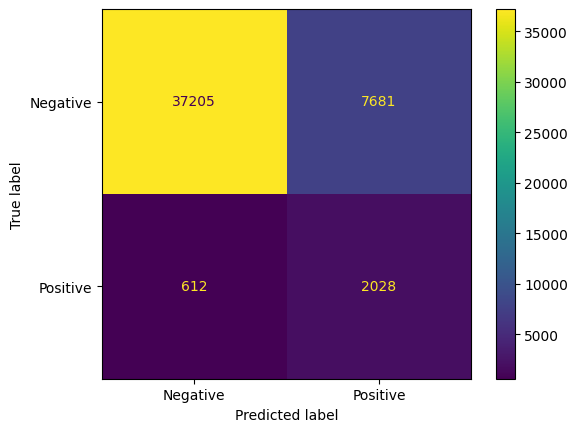

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input and first hidden layer
    Dropout(0.3),  # For dealing with overfitting
    Dense(32, activation='relu'),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['recall'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test), 
                    epochs=50, 
                    batch_size=256, 
                    callbacks=[early_stopping],
                    class_weight=class_weights_dict)

# Evaluate the model and generate metrics
# Predict probabilities and convert to binary predictions
y_train_prob = model.predict(X_train_scaled).ravel()  # Flatten probabilities
y_test_prob = model.predict(X_test_scaled).ravel()

threshold = 0.5
y_train_pred = (y_train_prob > threshold).astype(int)
y_test_pred = (y_test_prob > threshold).astype(int)

# Training Metrics
f1_train = f1_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Testing Metrics
f1_test = f1_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Print Metrics
print(f"F1 Score Train: {f1_train:.2f}")
print(f"F1 Score Test: {f1_test:.2f}")
print(f"Recall Train: {recall_train:.2f}")
print(f"Recall Test: {recall_test:.2f}")
print(f"Precision Train: {precision_train:.2f}")
print(f"Precision Test: {precision_test:.2f}")
print(f"ROC AUC Train: {roc_auc_train:.2f}")
print(f"ROC AUC Test: {roc_auc_test:.2f}")

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Negative", "Positive"]).plot()

plt.show()


## Compare finetuned model performance

In [51]:
models_metrics = [
    {
        "Model": "Random Forest",
        "train_F1": 0.38,
        "test_F1": 0.35,
        "train_recall": 0.82,
        "test_recall": 0.74,
        "train_precision": 0.25,
        "test_precision": 0.23,
        "train_RocAuc": 0.92,
        "test_RocAuc": 0.89
    },
    {
        "Model": "CatBoost",
        "train_F1": 0.33,
        "test_F1": 0.32,
        "train_recall": 0.80,
        "test_recall": 0.78,
        "train_precision": 0.21,
        "test_precision": 0.21,
        "train_RocAuc": 0.90,
        "test_RocAuc": 0.89
    },
    {
        "Model": "XGBoost",
        "train_F1": 0.33,
        "test_F1": 0.33,
        "train_recall": 0.79,
        "test_recall": 0.77,
        "train_precision": 0.21,
        "test_precision": 0.21,
        "train_RocAuc": 0.89,
        "test_RocAuc": 0.89
    },
    {
        "Model": "Neural Network",
        "train_F1": 0.34,
        "test_F1": 0.33,
        "train_recall": 0.80,
        "test_recall": 0.77,
        "train_precision": 0.22,
        "test_precision": 0.21,
        "train_RocAuc": 0.90,
        "test_RocAuc": 0.88
    },
    {
        "Model": "SVM",
        "train_F1": 0.46,
        "test_F1": 0.35,
        "train_recall": 0.86,
        "test_recall": 0.65,
        "train_precision": 0.32,
        "test_precision": 0.24,
        "train_RocAuc": 0.94,
        "test_RocAuc": 0.84
    },
    {
        "Model": "Logistic Regression",
        "train_F1": 0.34,
        "test_F1": 0.34,
        "train_recall": 0.77,
        "test_recall": 0.76,
        "train_precision": 0.22,
        "test_precision": 0.22,
        "train_RocAuc": 0.89,
        "test_RocAuc": 0.88
    }
]

# Convert the list of dictionaries into a DataFrame
models_metrics_df = pd.DataFrame(models_metrics)

# Set 'Model' column as the index
models_metrics_df.set_index("Model", inplace=True)

In [52]:
models_metrics_df

,train_F1,test_F1,train_recall,test_recall,train_precision,test_precision,train_RocAuc,test_RocAuc
Model,,,,,,,,
Random Forest,0.38,0.35,0.82,0.74,0.25,0.23,0.92,0.89
CatBoost,0.33,0.32,0.80,0.78,0.21,0.21,0.90,0.89
XGBoost,0.33,0.33,0.79,0.77,0.21,0.21,0.89,0.89
Neural Network,0.34,0.33,0.80,0.77,0.22,0.21,0.90,0.88
SVM,0.46,0.35,0.86,0.65,0.32,0.24,0.94,0.84
Logistic Regression,0.34,0.34,0.77,0.76,0.22,0.22,0.89,0.88


# Take forward 3 high-performing models and reduce the number of features

Fine-tuned Random Forest, CatBoost and XGBoost marginally better at predicting classes than other models (performance on test set ROC AUC). Take these models forward for feature reduction

Text(0.5, 1.0, 'Top 10 features for Random Forest classifier')

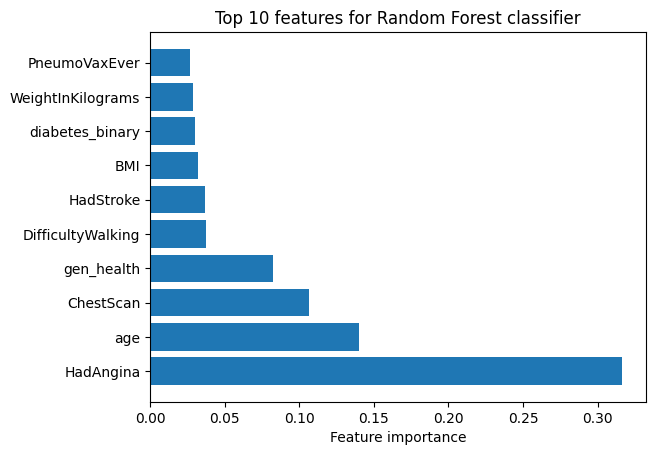

In [48]:
# Random Forest feature importance
feature_importances = rf_clf_best_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_ten = feature_importance_df.sort_values(by = 'Importance', ascending = False).head(10)

# Plot barchart of top 10 features
plt.barh(top_ten['Feature'], top_ten['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 10 features for Random Forest classifier')

# Take top 7 features, retrain my classifiers on reduced dataset

In [49]:
top_seven = feature_importance_df.sort_values(by = 'Importance', ascending = False).head(7)
X_reduced = X[top_seven['Feature'].values]

In [50]:
X_reduced.shape

(237630, 7)

In [53]:
X_reduced.head()

,HadAngina,age,ChestScan,gen_health,DifficultyWalking,HadStroke,BMI
0,1,11,1,3,1,0,32.099998
1,0,9,0,1,0,0,27.990000
2,0,8,0,0,0,0,22.530001
3,0,10,0,1,0,0,30.129999
4,0,6,1,2,0,0,27.760000


In [51]:
# Split my reduced feature dataset
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, stratify = y, random_state = 42)

Re-optimise random forest for redcued dataset

In [ ]:
# Try GridSearchCV to find best RF parameters
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [2, 10, 50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC
    cv=5,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_red, y_train)

# Display the best parameters and the best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train_red)
y_test_pred = best_model.predict(X_test_red)
y_train_pred_proba = best_model.predict_proba(X_train_red)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test_red)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")




KeyboardInterrupt: 

Best params are: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 500}

In [57]:
# initialise the finetuned RF classifier
rf_clf_best_model = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 500, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 50,
                                max_depth= 10,
                                random_state = 42)

# train the model
rf_clf_best_model.fit(X_train_red, y_train)

# make predicitons
y_pred_train = rf_clf_best_model.predict(X_train_red)
y_pred_test = rf_clf_best_model.predict(X_test_red)
y_pred_proba_train = rf_clf_best_model.predict_proba(X_train_red)[:,1] 
y_pred_proba_test = rf_clf_best_model.predict_proba(X_test_red)[:,1] # get the predicted probabilities for the positive class only (col 1)

# f1_score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")
# Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")


# ROC AUC
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print(f"ROC AUC train: {roc_auc_train:.2f}")
print(f"ROC AUC test: {roc_auc_test:.2f}")

F1 score train: 0.32
F1 score test: 0.31
Recall train: 0.79
Recall test: 0.76
Precision train: 0.20
Precision test: 0.20
ROC AUC train: 0.89
ROC AUC test: 0.88


Re-optimise catboost for reduced feature dataset

In [57]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 500, 1000],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

catboost_model = CatBoostClassifier(scale_pos_weight=scale_pos_weight, eval_metric='AUC', verbose=0, random_state=42) 

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #Startified kfold ensures that the folds maintain class distribution of original dataset

grid_search_results = catboost_model.grid_search(param_grid, 
                                                 X=X_train_red, 
                                                 y=y_train,  
                                                 cv=skf, 
                                                 verbose=1)

print(f"Best Parameters: {grid_search_results['params']}")

# Evaluate the tuned model on the test set
y_train_pred = catboost_model.predict(X_train_red) #CatBoostas built in gridsearch is integrated with the model instance, no need to update best params for fine-tuned model eval
y_test_pred = catboost_model.predict(X_test_red)
y_train_pred_proba = catboost_model.predict_proba(X_train_red)[:, 1]
y_test_pred_proba = catboost_model.predict_proba(X_test_red)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



bestTest = 0.883308184
bestIteration = 98

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8833082	best: 0.8833082 (0)	total: 1.56s	remaining: 6m 18s

bestTest = 0.8853783172
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8853783	best: 0.8853783 (1)	total: 2.92s	remaining: 5m 52s

bestTest = 0.8854374596
bestIteration = 73

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8854375	best: 0.8854375 (2)	total: 4.43s	remaining: 5m 54s

bestTest = 0.8835375994
bestIteration = 94

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8835376	best: 0.8854375 (2)	total: 5.94s	remaining: 5m 54s

best

Best Parameters: {'border_count': 64, 'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500}

In [58]:
# initialise fine-tuned catboost model
catboost_best_model = CatBoostClassifier(border_count = 64, 
                                         depth = 4, 
                                         learning_rate = 0.1, 
                                         l2_leaf_reg = 3, 
                                         iterations = 500, 
                                         random_state = 42)

# train the model
catboost_best_model.fit(X_train_red, y_train)

# make predictions
y_train_pred = catboost_best_model.predict(X_train_red)
y_test_pred = catboost_best_model.predict(X_test_red)
y_train_pred_proba = catboost_best_model.predict_proba(X_train_red)[:,1]
y_test_pred_proba = catboost_best_model.predict_proba(X_test_red)[:,1]

# get evaluation metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

0:	learn: 0.5371348	total: 17.7ms	remaining: 8.84s
1:	learn: 0.4274800	total: 31.2ms	remaining: 7.78s
2:	learn: 0.3508352	total: 40.5ms	remaining: 6.71s
3:	learn: 0.3002983	total: 49.5ms	remaining: 6.14s
4:	learn: 0.2590063	total: 58.7ms	remaining: 5.81s
5:	learn: 0.2334018	total: 67.2ms	remaining: 5.53s
6:	learn: 0.2154749	total: 74.6ms	remaining: 5.25s
7:	learn: 0.2001040	total: 83.4ms	remaining: 5.13s
8:	learn: 0.1891401	total: 91.3ms	remaining: 4.98s
9:	learn: 0.1798933	total: 101ms	remaining: 4.97s
10:	learn: 0.1732684	total: 110ms	remaining: 4.88s
11:	learn: 0.1686503	total: 118ms	remaining: 4.79s
12:	learn: 0.1646230	total: 127ms	remaining: 4.75s
13:	learn: 0.1613962	total: 135ms	remaining: 4.69s
14:	learn: 0.1589377	total: 143ms	remaining: 4.63s
15:	learn: 0.1573439	total: 151ms	remaining: 4.57s
16:	learn: 0.1556259	total: 161ms	remaining: 4.56s
17:	learn: 0.1547347	total: 168ms	remaining: 4.51s
18:	learn: 0.1536261	total: 177ms	remaining: 4.49s
19:	learn: 0.1527773	total: 185m

Re-train XGBoost on reduced feature dataset

In [59]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'scale_pos_weight': [scale_pos_weight]
}

# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC
    n_jobs=-1,          # Use all processors
    cv=5                # 5-fold cross-validation
)

# Fit the grid search
grid_search.fit(X_train_red, y_train)

# Display the best parameters and best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train_red)
y_test_pred = best_model.predict(X_test_red)
y_train_pred_proba = best_model.predict_proba(X_train_red)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test_red)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

Best params are: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 17.00056812801818}
Best ROC AUC score: 0.881145379560539
Train F1 Score: 0.31, Test F1 Score: 0.31
Train Recall: 0.78, Test Recall: 0.77
Train Precision: 0.20, Test Precision: 0.19
Train ROC AUC: 0.88, Test ROC AUC: 0.88


Best params are: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 17.00056812801818}

In [60]:
# Initialise best XGBoost model on the reduced dataset
xgb_clf_best_model = XGBClassifier(learning_rate = 0.05, 
                                   max_depth = 3, 
                                   n_estimators = 200, 
                                   scale_pos_weight = scale_pos_weight,
                                   random_state = 42)

# Train the model
xgb_clf_best_model.fit(X_train_red, y_train)

# Make predictions
y_pred_train = xgb_clf_best_model.predict(X_train_red)
y_pred_test = xgb_clf_best_model.predict(X_test_red)
y_pred_proba_train = xgb_clf_best_model.predict_proba(X_train_red)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = xgb_clf_best_model.predict_proba(X_test_red)[:,1]

#Evaluate predictions
train_F1 = f1_score(y_train, y_pred_train)
test_F1 = f1_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

Train F1 Score: 0.31, Test F1 Score: 0.31
Train Recall: 0.78, Test Recall: 0.77
Train Precision: 0.20, Test Precision: 0.19
Train ROC AUC: 0.88, Test ROC AUC: 0.88


Random Forest is performing marginally better than the other two models, take this one through to deployment

## Models seem to be struggling with FPs due to class imbalance. Try SMOTE to improve

In [52]:
from imblearn.over_sampling import SMOTE
# initialize SMOTE
smote = SMOTE(random_state = 42)

# apply resampling to training data
X_resampled, y_resampled = smote.fit_resample(X_train_red, y_train)

In [65]:
# initialise the finetuned RF classifier
rf_clf_smote = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 500, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 50,
                                max_depth= 10,
                                random_state = 42)


# train the model
rf_clf_smote.fit(X_resampled, y_resampled)

# Make predictions
y_pred_train = rf_clf_smote.predict(X_resampled)
y_pred_test = rf_clf_smote.predict(X_test_red)
y_pred_proba_train = rf_clf_smote.predict_proba(X_resampled)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = rf_clf_smote.predict_proba(X_test_red)[:,1]

# Evaluate on resampled training data
train_f1 = f1_score(y_resampled, y_pred_train)
train_recall = recall_score(y_resampled, y_pred_train)
train_precision = precision_score(y_resampled, y_pred_train)
train_roc_auc = roc_auc_score(y_resampled, y_pred_proba_train)

# Evaluate on original test data
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print the metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

Train F1 Score: 0.79, Test F1 Score: 0.29
Train Recall: 0.78, Test Recall: 0.78
Train Precision: 0.79, Test Precision: 0.18
Train ROC AUC: 0.88, Test ROC AUC: 0.87


In [53]:
# Much overfitting on resampled data, try finetuning again
# Try GridSearchCV to find best RF parameters
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [2, 10, 50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC
    cv=5,
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit the grid search on resampled data (only for tuning)
grid_search.fit(X_resampled, y_resampled)

# Display the best parameters and the best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best ROC AUC score from cross-validation: {grid_search.best_score_:.2f}")

# Refit the model with the best parameters on the original training data
best_model = grid_search.best_estimator_
best_model.fit(X_train_red, y_train)

# Make predictions on both train and test sets
y_train_pred = best_model.predict(X_train_red)
y_test_pred = best_model.predict(X_test_red)
y_train_pred_proba = best_model.predict_proba(X_train_red)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test_red)[:, 1]

# Calculate metrics for original training and test data
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
276 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python31

Best params are: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
Best ROC AUC score from cross-validation: 0.94
Train F1 Score: 0.67, Test F1 Score: 0.32
Train Recall: 0.95, Test Recall: 0.43
Train Precision: 0.52, Test Precision: 0.25
Train ROC AUC: 0.98, Test ROC AUC: 0.81


'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000

In [54]:
# initialise the SMOTE finetuned RF classifier
rf_clf_smote = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 1000, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 2,
                                max_depth= 50,
                                random_state = 42)


# train the model on the resampled data
rf_clf_smote.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_train = rf_clf_smote.predict(X_resampled)
y_pred_test = rf_clf_smote.predict(X_test_red)
y_pred_proba_train = rf_clf_smote.predict_proba(X_resampled)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = rf_clf_smote.predict_proba(X_test_red)[:,1]

# Evaluate on resampled training data
train_f1 = f1_score(y_resampled, y_pred_train)
train_recall = recall_score(y_resampled, y_pred_train)
train_precision = precision_score(y_resampled, y_pred_train)
train_roc_auc = roc_auc_score(y_resampled, y_pred_proba_train)

# Evaluate on original test data
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print the metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")


Train F1 Score: 0.95, Test F1 Score: 0.29
Train Recall: 0.95, Test Recall: 0.50
Train Precision: 0.94, Test Precision: 0.20
Train ROC AUC: 0.99, Test ROC AUC: 0.79


In [56]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[39558  5328]
 [ 1311  1329]]


Performance of RF using SMOTE resampled data appears worse!


In [ ]:
## Save best perfroming model: Random Forest

In [ ]:
import os
# Define the path to the new folder on the Desktop
folder_path = r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\Heart_disease_streamlit"


# Create the directory if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Define the full path for the model file
model_path = os.path.join(folder_path, "bestRF_model.pkl")

# Save the model using pickle
with open(model_path, "wb") as file:
    pickle.dump(rf_clf_best_model, file)

print(f"Model saved successfully to: {model_path}")


Model saved successfully to: C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\Heart_disease_streamlit\bestRF_model.pkl


## Extract feature list for params to enter

In [64]:
feature_list = X_reduced.columns.tolist()
feature_list

['HadAngina',
 'age',
 'ChestScan',
 'gen_health',
 'DifficultyWalking',
 'HadStroke',
 'BMI']

In [72]:
# look at allowed values for user input into deployed model
for col in X_reduced.columns:
    unique_values = sorted(X_reduced[col].unique())
    print(f'{col}: {unique_values}')


HadAngina: [0, 1]
age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ChestScan: [0, 1]
gen_health: [0, 1, 2, 3, 4]
DifficultyWalking: [0, 1]
HadStroke: [0, 1]
BMI: [12.0200004577637, 12.0500001907349, 12.1099996566772, 12.1599998474121, 12.2700004577637, 12.3400001525879, 12.3599996566772, 12.3999996185303, 12.4399995803833, 12.4799995422363, 12.5, 12.5500001907349, 12.6899995803833, 12.75, 12.7700004577637, 12.7799997329712, 12.8299999237061, 12.8400001525879, 12.8699998855591, 12.8800001144409, 12.9099998474121, 12.9200000762939, 12.9399995803833, 12.9799995422363, 13.0, 13.1000003814697, 13.1099996566772, 13.1599998474121, 13.1899995803833, 13.2399997711182, 13.25, 13.289999961853, 13.3100004196167, 13.3400001525879, 13.3900003433228, 13.4700002670288, 13.5299997329712, 13.5600004196167, 13.6300001144409, 13.6400003433228, 13.6599998474121, 13.6800003051758, 13.7200002670288, 13.7299995422363, 13.75, 13.7600002288818, 13.7799997329712, 13.8100004196167, 13.8199996948242, 13.84000015258

In [70]:
X_reduced.BMI.describe() # min 12 max 98

count    237630.000000
mean         28.691602
std           6.528065
min          12.020000
25%          24.280001
50%          27.459999
75%          31.900000
max          97.650002
Name: BMI, dtype: float64